## Название проекта: Банки - Анализ оттока клиентов

В качестве стажёра-аналитика нам предстоит проанализировать клиентов регионального банка для выявления их оттока и установить признаки, которые с этим связаны.  
**Цель проекта** - выявить признаки отточности клиентов, применяя навыки аналитика данных.  
  
**Задачи:**  
  
1. Произвести предварительную обработку данных.  
    а) найти пропуски, дубликаты и выбросы и принять решение об устранении их влияния на рельультаты работы.  
    б) закодировать категориальные данные для их подготовки к анализу.  
1. Проанализировать основные признаки, наиболее сильно влияющие на отток клиентов.  
    а) построить необходимые визуализации;  
    б) изучить взаимосвязи признаков с целевой переменной.  
2. Сформировать типичные портреты клиентов: выделить несколько основные групп и охарактеризовать из основные свойства.  
    а) применить навыки работы с машинным обучением.  
    б) охарактеризовать полученные результаты, выделив наиболее яркие сочетания признаков и установив их приоритезацию.  
3. Научиться прогнозировать вероятность оттока клиентов (на уровне достаточного времени для принятия организационных действий, но максимально краткое, чтобы избежать оттока; месяц, два месяца и тому подобное).  
4. Сформулировать и проверить статистические гипотезы различия разных групп клиентов.
5. Сформулировать основные выводы и разработать рекомендации по работе с клиентами:  
    а) выделить основные целевые группы;  
    б) предложить меры по снижению оттока;  
    в) определить другие особенности взаимодействия с клиентами.  
  
**Описание данных.**  
Исходные данные находятся в датасете 'bank_scrooge.csv'. Набор данные включает в себя слудующие поля:  
- 'USERID' — идентификатор пользователя,
- 'score' — баллы кредитного скоринга,
- 'city' — город,
- 'gender' — пол,
- 'age' — возраст,
- 'equity' — количество баллов собственности
- 'balance' — баланс на счёте,
- 'products' — количество продуктов, которыми пользуется клиент,
- 'credit_card' — есть ли кредитная карта,
- 'last_activity' — активный клиент,
- 'EST_SALARY' — оценочный доход клиента,
- 'сhurn' — признак оттока.

## Загрузка данных.

Загрузим необходимые для работы библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats as st

Загрузим таблицу с данными и рассмотрим её.

In [2]:
try:
    data = pd.read_csv('G:\Study\Final\bank_scrooge.csv')
except:
    url="https://code.s3.yandex.net/datasets/bank_scrooge.csv"
    data=pd.read_csv(url)

In [3]:
#  рассмотрим полученные данные
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Данные успешно загружены и отображаются корректно. Рассмотрим размер таблицы.

In [4]:
data.shape

(10000, 12)

Всего 10000 строк, каждая из которых предоставляет данные об одном клиенте по 11 признакам и одной целевой переменной.  
Рассмотрим типы данные и количество пропусков в датасете.

In [5]:
data.duplicated().sum()

0

Явных дубликатов нет, однако не исключается наличие неявных. Их наличие возможно будет выяснить на этапе предобработки данных.  
Теперь рассмотрим статистические характеристики данных.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
USERID,10000.0,171814.712600,3.370824e+04,94561.0,142810.25,172728.000,201261.7500,2.291450e+05
score,10000.0,848.699400,6.544852e+01,642.0,802.00,853.000,900.0000,1.000000e+03
age,9974.0,42.734409,1.217997e+01,18.0,33.00,40.000,51.0000,8.600000e+01
equity,10000.0,2.627600,1.980836e+00,0.0,0.00,3.000,4.0000,9.000000e+00
balance,7705.0,827794.306510,1.980614e+06,0.0,295554.16,524272.200,980705.8500,1.191136e+08
products,10000.0,1.870100,7.926467e-01,0.0,1.00,2.000,2.0000,5.000000e+00
credit_card,10000.0,0.680400,4.663449e-01,0.0,0.00,1.000,1.0000,1.000000e+00
last_activity,10000.0,0.523500,4.994724e-01,0.0,0.00,1.000,1.0000,1.000000e+00
EST_SALARY,10000.0,147866.885544,1.393885e+05,2546.3,75251.90,119658.105,174500.5425,1.395064e+06
churn,10000.0,0.182000,3.858638e-01,0.0,0.00,0.000,0.0000,1.000000e+00


Из 12 столбцов 10 содержат количественные данные рассмотрим их.  
Значения уникальных идентификторов клиентов не смысла анализировать по распределению величин. В будущем лучше всего будет изменить тип данных этого столбца на object.  
Значения баллов кредитного скоринга имеют среднее значение в 848 баллов. При этом максимальное значение значительно больше, чем другие значения. Возможно имеют место аномалии в данных.  
Возраст клиентов имеет среднее значение в 42 года. Судя по тому, что медиана равна 40, мы можем наблюдать небольшое смещение значений возраста климентов в сторону больших значений. Максимальное значение также несоизмеримо больше других значений, показывая наличие аномалии в данных.  
Значения количества баллов собственности у клиентов смещены к меньшим значениям. Наблюдаются аномальные значения.  
Значения баланса на счете клиентов демонстрирует значительное смещение значений к большим значениям.  
Распределение количество продуктов, которыми пользуется клиенты, смещены в меньшую от центра сторону.  
Судя по данным, большинство клиентов имеет кредитную карту.  
Немного больше половины клиентов является активными.  
Значения оценочного дохода клиентов также имеют некоторое смещение в сторону больших значений.  
Большинство клиентов не имеют признак оттока.  
Судя по полученным данным, общей проблемой значений во всех столбцах являются свехбольшие максимальные значения, которые нам предостоит устранить на этапе предобработки данных.  
Рассмотрим сводную информацию по датасету для определения других предстоящих изменений.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Подведём предварительный итог на данном этапе.  
1) Данные были успешно загружены.  
2) Были рассмотрены значения количественные переменных и рассмотрены значения их распределения в датасете.  
3) Судя по сводной информации по датасету, изменения подвергнутся следующие колонки:  
    а) USERID - изменение типа данных на object,  
    б) age, score, equity, products,  - изменение типа данных на целочисленные значения,  
    в) balance, EST_SALARY - уменьшение количества знаков после запятой до 2-ух.

## Предобработка данных.

Начнём предобработку данных с приведения названий столбцов к единому стилю.

In [8]:
data.columns = data.columns.str.lower()

Проверим внесённые изменения.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Изменения прошли успешно.
Сразу же изменим тип данных первого столбца, 'userid' на object.

In [10]:
data['userid'] = data['userid'].astype(object)

Также переименуем столбец на более подходящее имя.

In [11]:
data = data.rename(columns={'userid': 'user_id'})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  object 
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 937.6+ KB


Изменения произведены успешно. Подробнее изучим значения с уникальными идентификаторами клиентов для поиска неявных дубликатов или пропусков.

In [13]:
print(data['user_id'].sort_values().unique())
data['user_id'].value_counts()

[94561 94590 95384 ... 229130 229136 229145]


141265    2
217826    2
126368    2
195884    2
202983    2
         ..
199413    1
205705    1
221433    1
152512    1
96267     1
Name: user_id, Length: 9927, dtype: int64

Часть данных имеет дубликаты, хотя для уникальных идентификаторов это не является допустимым. Рассмотрим повторяющиеся значения уникальных идентификаторов подробнее.

In [14]:
duplicateRows = data[data.duplicated(['user_id'])].sort_values(by='user_id')
diplicetes_list = duplicateRows['user_id'].tolist()
data.query('user_id == @diplicetes_list').sort_values(by='user_id').head(20)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


Можно заметить, что дублирующие идентификаторы клиентов относятся к городам Рыбинску и Ярославлю; другие города не фигурируют. Вероятно, имела место ошибка при совмещении разных таблиц. Относительно целевой переменной оттока клиентов заметно наличие как отсутствие признака оттока, так и его наличие. Удаление одного повторящегося значения может привести к искажению итоговых результатов. Рассмотрим количество строк, в которых встречаются дубликаты.

In [15]:
len(data.query('user_id == @diplicetes_list').sort_values(by='user_id'))

146

Всего 146 строк против 10000 составляет 0,0146 часть. И исключив эту часть, мы повысим достоверность данных.

In [16]:
# сохраним датасет до исключения дубликрующих строк
row_data = data.copy()

In [17]:
data = data.query('user_id != @diplicetes_list')

In [18]:
# проверим успешность произведённых изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9854 non-null   object 
 1   score          9854 non-null   float64
 2   city           9854 non-null   object 
 3   gender         9854 non-null   object 
 4   age            9851 non-null   float64
 5   equity         9854 non-null   int64  
 6   balance        7608 non-null   float64
 7   products       9854 non-null   int64  
 8   credit_card    9854 non-null   int64  
 9   last_activity  9854 non-null   int64  
 10  est_salary     9854 non-null   float64
 11  churn          9854 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 1000.8+ KB


In [19]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


Мы устранили дублирование значений уникальных идентификаторов, приняв решение об удалении строк из датасета. Перейдём к следующему столбцу.

In [20]:
print(data['score'].sort_values().unique())
data['score'].value_counts()

[ 642.  646.  648.  649.  650.  651.  652.  653.  654.  655.  656.  657.
  658.  659.  660.  661.  662.  663.  664.  665.  666.  667.  668.  669.
  670.  671.  673.  678.  680.  681.  682.  684.  685.  686.  687.  688.
  689.  690.  691.  692.  693.  694.  695.  696.  697.  698.  699.  700.
  701.  702.  703.  704.  705.  706.  707.  708.  709.  710.  711.  712.
  713.  714.  715.  716.  717.  718.  719.  720.  721.  722.  723.  724.
  725.  726.  727.  728.  729.  730.  731.  732.  733.  734.  735.  736.
  737.  738.  739.  740.  741.  742.  743.  744.  745.  746.  747.  748.
  749.  750.  751.  752.  753.  754.  755.  756.  757.  758.  759.  760.
  761.  762.  763.  764.  765.  766.  767.  768.  769.  770.  771.  772.
  773.  774.  775.  776.  777.  778.  779.  780.  781.  782.  783.  784.
  785.  786.  787.  788.  789.  790.  791.  792.  793.  794.  795.  796.
  797.  798.  799.  800.  801.  802.  803.  804.  805.  806.  807.  808.
  809.  810.  811.  812.  813.  814.  815.  816.  8

900.0    80
889.0    74
899.0    69
894.0    69
912.0    67
         ..
666.0     1
667.0     1
673.0     1
684.0     1
995.0     1
Name: score, Length: 348, dtype: int64

В столбце с баллами кредитного скоринга отсутствуют пропущенные значения, а одинаковые значения в данном случае не следует расценивать в качестве дубликатов, в данном случае это допустимо.  
Изменим тип данных на целочисленный.

In [21]:
data['score'] = data['score'].astype(int)

In [22]:
# проверим успешность произведённых изменений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9854 non-null   object 
 1   score          9854 non-null   int32  
 2   city           9854 non-null   object 
 3   gender         9854 non-null   object 
 4   age            9851 non-null   float64
 5   equity         9854 non-null   int64  
 6   balance        7608 non-null   float64
 7   products       9854 non-null   int64  
 8   credit_card    9854 non-null   int64  
 9   last_activity  9854 non-null   int64  
 10  est_salary     9854 non-null   float64
 11  churn          9854 non-null   int64  
dtypes: float64(3), int32(1), int64(5), object(3)
memory usage: 962.3+ KB


Теперь рассмотрим значения следующего столбца.

In [23]:
print(data['city'].sort_values().unique())
data['city'].value_counts()

['Ростов' 'Рыбинск' 'Ярославль']


Ярославль    5815
Рыбинск      2622
Ростов       1417
Name: city, dtype: int64

Всего три вариации значения, обозначающее город проживания клиента. Пропусков и дубликатов не установлено.

In [24]:
print(data['gender'].sort_values().unique())
data['gender'].value_counts()

['Ж' 'М']


М    4929
Ж    4925
Name: gender, dtype: int64

In [25]:
data['coded_gender'] = data['gender']
data['coded_gender'] = data['coded_gender'].replace('М', 1)
data['coded_gender'] = data['coded_gender'].replace('Ж', 0)

In [26]:
data['coded_gender'].value_counts()

1    4929
0    4925
Name: coded_gender, dtype: int64

Изменим тип данных на целочисленный.

In [27]:
data['coded_gender'] = data['coded_gender'].astype(int)

In [28]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,coded_gender
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1


In [29]:
print(data['gender'].sort_values().unique())
data['gender'].value_counts()

['Ж' 'М']


М    4929
Ж    4925
Name: gender, dtype: int64

Близкое к равному разделение выборки по признаку пола клиента. Пропуски и дубликаты отсутствуют.  
Для будущего анализа предпочтительно закодировать категориальные данные.

In [30]:
data['coded_gender'] = data['gender']
data['coded_gender'] = data['coded_gender'].replace('М', 1)
data['coded_gender'] = data['coded_gender'].replace('Ж', 0)

In [31]:
data['coded_gender'].value_counts()

1    4929
0    4925
Name: coded_gender, dtype: int64

Изменим тип данных на целочисленный.

In [32]:
data['coded_gender'] = data['coded_gender'].astype(int)

In [33]:
print(data['age'].sort_values().unique())
data['age'].value_counts()

[18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 86. nan]


36.0    408
37.0    394
33.0    384
35.0    383
34.0    378
       ... 
83.0      3
82.0      2
84.0      2
79.0      2
86.0      2
Name: age, Length: 68, dtype: int64

Значения, обозначающие возраст клиентов, представлены без аномалий в значениях. Есть пропуски в количестве трёх случаев. Поскольку столбец с возрастом клиентов не является целевой переменной в будущем исследовании, а также показывает достаточно низкое число случаев, а заполнить их достоверными данными не представляется возможным, наиболее приемлемым будет оставить пропуски. Перейдём к следующему столбцу.

In [34]:
print(data['equity'].sort_values().unique())
data['equity'].value_counts()

[0 1 2 3 4 5 6 7 8 9]


0    2537
5    1892
4    1822
3    1527
2    1043
1     769
6     157
7      77
8      17
9      13
Name: equity, dtype: int64

Данный столбец также содержит только допустимые данные, дубликатов и пропусков не обнаружено. Преобразований типа данных не требуется.

In [35]:
print(data['balance'].sort_values().unique())
data['balance'].value_counts()

[0.00000000e+00 6.00000000e+00 7.00000000e+00 ... 6.48662101e+07
 1.19113552e+08            nan]


26.00         2
0.00          2
39.00         2
38.00         2
59214.82      1
             ..
906647.86     1
1034975.51    1
663398.93     1
215592.82     1
1180886.70    1
Name: balance, Length: 7604, dtype: int64

В столбце со значениями баланса денежных средств на счёте клиентов находится довольно много пропущенных значений. Однако заполнить пропуски достоверными значениями не представляется возможным. А поскольку данный столбец не является целевым признаком, то является вполне допустимым оставить данные в исходном виде. Рассмотрим подробнее пропущенные значения.

In [36]:
data['balance'].isna().sum()

2246

Всего 2246 значений имеют пропуски в столбце 'balance'. Данное число явялется достаточно значимым от общего числа строк в датасете. Постараемся рассмотреть возможность замены пропусков на максимально достоверные сведения.  
Но для начала рассмотрим значения, которые имеют пропуски и определим есть ли взаимосвязь пропусков в значениях баланса с другими признаками.

In [37]:
# подготовим копию исходного датасета
no_balance = data.copy()
# теперь заменим все пропуски значений баланса на определённое значение, которое не наблюдалось ранее в столбце
no_balance['balance'] = no_balance['balance'].fillna(-1)
# рассмотрим что получилось
no_balance.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,coded_gender
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,Ж,30.0,0,-1.00,1,1,1,107683.34,0,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1


In [38]:
no_balance = no_balance.query('balance == -1')
no_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246 entries, 2 to 9997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2246 non-null   object 
 1   score          2246 non-null   int32  
 2   city           2246 non-null   object 
 3   gender         2246 non-null   object 
 4   age            2246 non-null   float64
 5   equity         2246 non-null   int64  
 6   balance        2246 non-null   float64
 7   products       2246 non-null   int64  
 8   credit_card    2246 non-null   int64  
 9   last_activity  2246 non-null   int64  
 10  est_salary     2246 non-null   float64
 11  churn          2246 non-null   int64  
 12  coded_gender   2246 non-null   int32  
dtypes: float64(3), int32(2), int64(5), object(3)
memory usage: 228.1+ KB


In [39]:
# ещё раз рассмотрим значения столбов с баллами кредитного скоринга и сравним их с аналогичными значениями пользователей
# с пропусками в значениях баланса
print(data['score'].sort_values().unique())
print(data['score'].value_counts())
print(no_balance['score'].sort_values().unique())
no_balance['score'].value_counts()

[ 642  646  648  649  650  651  652  653  654  655  656  657  658  659
  660  661  662  663  664  665  666  667  668  669  670  671  673  678
  680  681  682  684  685  686  687  688  689  690  691  692  693  694
  695  696  697  698  699  700  701  702  703  704  705  706  707  708
  709  710  711  712  713  714  715  716  717  718  719  720  721  722
  723  724  725  726  727  728  729  730  731  732  733  734  735  736
  737  738  739  740  741  742  743  744  745  746  747  748  749  750
  751  752  753  754  755  756  757  758  759  760  761  762  763  764
  765  766  767  768  769  770  771  772  773  774  775  776  777  778
  779  780  781  782  783  784  785  786  787  788  789  790  791  792
  793  794  795  796  797  798  799  800  801  802  803  804  805  806
  807  808  809  810  811  812  813  814  815  816  817  818  819  820
  821  822  823  824  825  826  827  828  829  830  831  832  833  834
  835  836  837  838  839  840  841  842  843  844  845  846  847  848
  849 

912    40
913    39
900    39
903    36
920    34
       ..
788     1
819     1
976     1
794     1
818     1
Name: score, Length: 258, dtype: int64

Особых отличий обнаружить не удалось. Таким же образом рассмотрим значения столбца с возрастом клиентов ('age').

In [40]:
print(data['age'].sort_values().unique())
print(data['age'].value_counts())
print(no_balance['age'].sort_values().unique())
no_balance['age'].value_counts()

[18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 86. nan]
36.0    408
37.0    394
33.0    384
35.0    383
34.0    378
       ... 
83.0      3
82.0      2
84.0      2
79.0      2
86.0      2
Name: age, Length: 68, dtype: int64
[18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 83. 86.]


36.0    104
37.0     96
33.0     95
35.0     89
32.0     87
       ... 
78.0      2
83.0      1
77.0      1
79.0      1
86.0      1
Name: age, Length: 66, dtype: int64

По столбцу с возрастом клиентов также не удалось установить закономерности с возникновением пропусков в балансе клиентов.  
Перейдём к рассмотрению значений столбца количества баллов собственности клиентов ('equity').

In [41]:
print(data['equity'].sort_values().unique())
print(data['equity'].value_counts())
print(no_balance['equity'].sort_values().unique())
no_balance['equity'].value_counts()

[0 1 2 3 4 5 6 7 8 9]
0    2537
5    1892
4    1822
3    1527
2    1043
1     769
6     157
7      77
8      17
9      13
Name: equity, dtype: int64
[0 1 3]


0    2131
1     114
3       1
Name: equity, dtype: int64

А здесь нам удалось установить любопытную закономерность: большинство клиентов, которые имели пропуски в значениях баланса, имели минимальное баллов собственности. Возможно, клиенты с неуказанными значениями баланса, просто на момент извлечения данных, не имели на своём счёте денежных средств.
Продолжим анализировать столбцы до принятия каких-либо окончательных решений.

In [42]:
print(no_balance['products'].sort_values().unique())
no_balance['products'].value_counts()

[0 1 2 3]


1    1907
2     310
3      28
0       1
Name: products, dtype: int64

In [43]:
print(no_balance['credit_card'].sort_values().unique())
no_balance['credit_card'].value_counts()

[0 1]


1    1831
0     415
Name: credit_card, dtype: int64

In [44]:
print(no_balance['last_activity'].sort_values().unique())
no_balance['last_activity'].value_counts()

[0 1]


1    1232
0    1014
Name: last_activity, dtype: int64

In [45]:
print(no_balance['est_salary'].sort_values().unique())
no_balance['est_salary'].value_counts()

[  20274.03   20722.49   20858.46 ... 1296838.08 1307090.18 1333687.36]


107683.34    1
231825.96    1
715334.34    1
102463.24    1
120715.05    1
            ..
236163.15    1
202791.80    1
94307.04     1
153899.23    1
108905.09    1
Name: est_salary, Length: 2246, dtype: int64

In [46]:
no_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2246 entries, 2 to 9997
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2246 non-null   object 
 1   score          2246 non-null   int32  
 2   city           2246 non-null   object 
 3   gender         2246 non-null   object 
 4   age            2246 non-null   float64
 5   equity         2246 non-null   int64  
 6   balance        2246 non-null   float64
 7   products       2246 non-null   int64  
 8   credit_card    2246 non-null   int64  
 9   last_activity  2246 non-null   int64  
 10  est_salary     2246 non-null   float64
 11  churn          2246 non-null   int64  
 12  coded_gender   2246 non-null   int32  
dtypes: float64(3), int32(2), int64(5), object(3)
memory usage: 228.1+ KB


In [47]:
print(no_balance['est_salary'].sort_values().unique())
no_balance['est_salary'].value_counts()

[  20274.03   20722.49   20858.46 ... 1296838.08 1307090.18 1333687.36]


107683.34    1
231825.96    1
715334.34    1
102463.24    1
120715.05    1
            ..
236163.15    1
202791.80    1
94307.04     1
153899.23    1
108905.09    1
Name: est_salary, Length: 2246, dtype: int64

In [48]:
print(no_balance['churn'].sort_values().unique())
no_balance['churn'].value_counts()

[0 1]


0    2233
1      13
Name: churn, dtype: int64

Обнаружена наиболее явная связь отсутствия значения баланса с значением "1" столбца баллов собственности ('equity'). Также большинство клиентов, по данным баланса которых нет информации, имеют кредитную карту и пользуются одним банковским продукт (что вероятно между собой связано). Однако значение столбца 'credit_card' является бинарным, поэтому оринтироваться на него при заполнении пропусков не стоит. Но для начала посмотрим как отличаются средние и медианы значения баланса у всех клиентов и по срезу клиентов с значением "1" баллом собственности ('equity').

In [49]:
# для начала определим среднее и медиану значения баланса у всех клиентов, а также узнаем о каком количестве клиентов идёт речь
print(data['balance'].mean())
print(data['balance'].median())
print(len(data['balance']))
# затем сравним их с теми же значениями, но теперь в рамках среза клиентов с минимальным значением балла собственности
print(data.query('equity == 0')['balance'].mean())
print(data.query('equity == 0')['balance'].median())
print(len(data.query('equity == 0')['balance']))
# немного сузим срез, включив в него дополнительно владельцев кредитных карт
print(data.query('equity == 0 and credit_card == 1')['balance'].mean())
print(data.query('equity == 0 and credit_card == 1')['balance'].median())
print(len(data.query('equity == 0 and credit_card == 1')['balance']))
# также добавим клиентов с одним подключённым продуктом
print(data.query('equity == 0 and credit_card == 1 and products == 1')['balance'].mean())
print(data.query('equity == 0 and credit_card == 1 and products == 1')['balance'].median())
print(len(data.query('equity == 0 and credit_card == 1 and products == 1')['balance']))

823861.5973987906
522629.745
9854
156031.47975369458
135851.53
2537
146665.78541958044
120462.57
2020
149664.69648648647
124090.06
1590


Всё больше уточняя срез данных мы обнаружили, что подвергались изменению лишь средние значения и количество попавших в срез клиентов. Медиана же всегда оставалсь одинаковой. Это показывает, что наиболее сильно на пропуск значений баланса повлияли значения баллов имущества клиентов. Срез данных помог найти наиболее подходящее значение для замены пропущенных значений. Произведём замену.

In [50]:
data['balance'] = data['balance'].fillna(data.query('equity == 0')['balance'].median())
# вызовем первые строчки датасета для рассмотрения применения изменений.
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,coded_gender
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892,Рыбинск,Ж,30.0,0,135851.53,1,1,1,107683.34,0,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9854 non-null   object 
 1   score          9854 non-null   int32  
 2   city           9854 non-null   object 
 3   gender         9854 non-null   object 
 4   age            9851 non-null   float64
 5   equity         9854 non-null   int64  
 6   balance        9854 non-null   float64
 7   products       9854 non-null   int64  
 8   credit_card    9854 non-null   int64  
 9   last_activity  9854 non-null   int64  
 10  est_salary     9854 non-null   float64
 11  churn          9854 non-null   int64  
 12  coded_gender   9854 non-null   int32  
dtypes: float64(3), int32(2), int64(5), object(3)
memory usage: 1000.8+ KB


Продолжим проверку на наличие дубликатов и пропусков, переходим к последнему столбцу.

In [52]:
print(data['products'].sort_values().unique())
data['products'].value_counts()

[0 1 2 3 4 5]


2    5070
1    3287
3    1021
4     457
5      18
0       1
Name: products, dtype: int64

Дубликатов и пропусков нет, тип данных является оптимальным. Обращает на себя внимание некоторое расхождение с логикой в значениях, при которых клиенты банка не могут не иметь ни одного подключённого продукта. Удалим имеющееся значение, поскольку это явный выброс.

In [53]:
data = data[data['products'] != 0]

In [54]:
print(data['credit_card'].sort_values().unique())
data['credit_card'].value_counts()

[0 1]


1    6704
0    3149
Name: credit_card, dtype: int64

Пропусков и дубликатов нет, выбросы отсутствуют.

In [55]:
print(data['last_activity'].sort_values().unique())
data['last_activity'].value_counts()

[0 1]


1    5140
0    4713
Name: last_activity, dtype: int64

Также близкое к равному разделению выборки по активности клиентов. Дубликатов и пропусков нет.

In [56]:
print(data['est_salary'].sort_values().unique())
data['est_salary'].value_counts()

[   2546.3     3487.33    5043.14 ... 1333687.36 1363549.52 1395064.45]


108250.17    2
49742.87     2
176348.18    2
75719.14     1
152681.68    1
            ..
54692.36     1
104774.84    1
83033.52     1
69697.85     1
21422.37     1
Name: est_salary, Length: 9850, dtype: int64

Дубликатов и пропусков не обнаружено, максимальные значения в пределах разумных норм.

In [57]:
print(data['churn'].sort_values().unique())
data['churn'].value_counts()

[0 1]


0    8084
1    1769
Name: churn, dtype: int64

Отсутствуют пропуски и дубликаты.  
В целом данные поступили в достаточно хорошем виде, больших усилий по их очистке не потребовалось. Пройдёмся по предпринятым действиям, подведём итог по данному этапу.  
  
1) Были обнаружены дубликаты уникальных значений пользователей в колонке 'user_id'. Вероятнее всего, при слиянии двух таблиц из разных городов задвоились клиенты, которые обслуживаясь в банке, позднее переехали в другой город. Дубликаты были удалены из датасета. Также тип данные столбца был изменён на object для удобства обрабоки данных в будущем.  
2) Были проверены на наличие дубликатов и пропусков все столбцы. Колонке со значениями возраста ('age') и баланс счета клиентов ('balance') содержали пропуски, но были признаны не критичными и оставлены в исходном виде.  
3) Изменение типов данных и корректировка знаков после запятой у значений не потребовалась.  
На этом перейдём к следующему этапу работы с данными.

## Исследовательский анализ данных.

Приступим к изучению особенностей оттока клиентов. Для этого проанализируем для начала категориальные значения. Узнаем сколько клиентов ушло и сколько осталось.

In [58]:
data['churn'].value_counts()

0    8084
1    1769
Name: churn, dtype: int64

Для последующего анализа оттока клиентов, сохраним исходные значения оттока по всему датасету.

In [59]:
share_churn = round(len(data.query('churn == 1')) / len(data) * 100, 2)

In [60]:
# проверим содержимое
share_churn

17.95

На одного ушедшего клиента приходится около пяти оставшихся. Это довольно оптимистичные показатели, хотя и демонстрирует некоторые упущения в работе с клиентами.  
  
**Анализ категориальных признаков.**  
  
Изучим каждый категориальный признак по наличию и отсутствию целевого признака, то есть оттока клиентов. Построим визуализации, которые бы наиболее полно позволили оценить разницу между двумя категориями.  
Составим для этого функцию, которая будет выводить столбчатую диаграмму.

In [61]:
def barplot(data, x, y, title, xlabel, ylabel, legend, color):
    data.plot(x, y, kind='bar', figsize=(6,3), alpha=.7, legend=legend, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Также составим функцию, которая отобразит все необходимые сведения, а именно:

1) Общую таблицу со значением количества клиентов, количеством ушедших клиентов и долей оттока клиентов в зависимости от целевого признака.  
2) Столбчатую диаграмму с общим количеством клиентов и количеством ушедших клиентов в зависимости от целевого признака.  
3) Столбчатую диаграмму с долей ушедших клиентов в зависимости от изучаемого признака.

In [62]:
def category_analysis(investigated):
    temp = data.groupby(investigated).agg({'churn': ['count', 'sum']}).reset_index()
    temp.columns = [investigated, 'Все_клиенты', 'Отточные_клиенты']
    temp['Доля_оттока'] = round(temp['Отточные_клиенты'] / temp['Все_клиенты'], 2)
    print(temp)
    title = f"Общее количество клиентов и количество ушедших клиентов \n в зависимости от признака '{investigated}'"
    xlabel = 'Значение признака'
    ylabel = 'Количество клиентов'
    barplot(temp, investigated, ['Все_клиенты', 'Отточные_клиенты'], title, xlabel, ylabel, True, None)
    title = f"Доля ушедших клиентов в зависимости от признака '{investigated}'"
    ylabel = 'Доля ушедших клиентов'
    barplot(temp, investigated, 'Доля_оттока', title, xlabel, ylabel, True, 'tomato')

        city  Все_клиенты  Отточные_клиенты  Доля_оттока
0     Ростов         1417               266         0.19
1    Рыбинск         2621               415         0.16
2  Ярославль         5815              1088         0.19


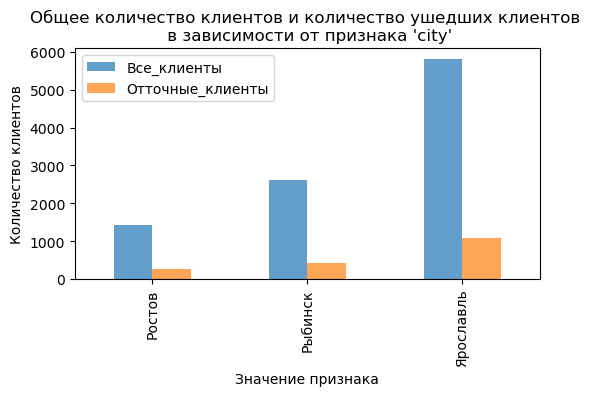

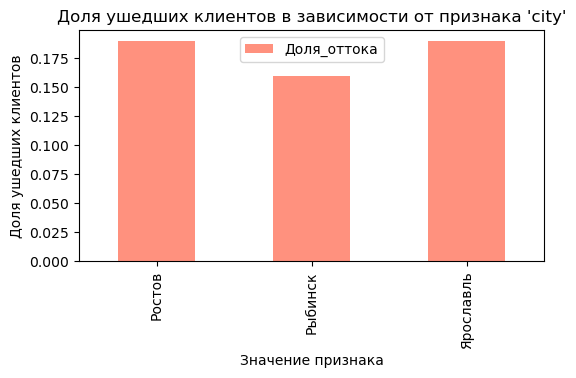

In [63]:
category_analysis('city')

Судя по полученным данным наибольшее количество клиентов банка проживает в Ярославле; там же наблюдается наибольшее число оттока клиентов. В Ростове клиентов банка наименьшее число, как и значение оттока клиентов. Однако, по значениям долей оттока клиентов от общего числа клиентов Ярославль имеет долю оттока клиентов, равную Ростову. В городе Рыбинке клиентов банка больше, чем в Ростове, однако доля оттока клиентов там ниже. С некоторой долей уверенности можно утверждать, что место проживание клиента влияет на целевую переменную, и при будущем анализе нам следует его учитывать.  
Рассмотрим следующий признак.

  gender  Все_клиенты  Отточные_клиенты  Доля_оттока
0      Ж         4924               616         0.13
1      М         4929              1153         0.23


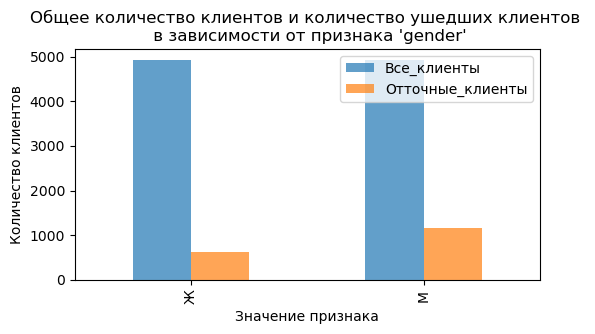

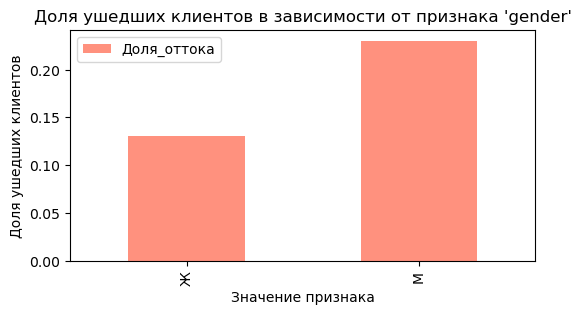

In [64]:
category_analysis('gender')

Судя по полученным данным, среди ушедших клиентов значительно больше мужчин, почти в два раза. Наиболее показательна выявленная разница потому, что разделение клиентов по полу изначально было достаточно близким к равному. Тем не менее, становится очивидным, что пол клиента является важным признаком при изучении их оттока.  
Продолжим изучение категориальных признаков.

   equity  Все_клиенты  Отточные_клиенты  Доля_оттока
0       0         2537                87         0.03
1       1          769                91         0.12
2       2         1043               164         0.16
3       3         1526               315         0.21
4       4         1822               449         0.25
5       5         1892               561         0.30
6       6          157                54         0.34
7       7           77                35         0.45
8       8           17                 6         0.35
9       9           13                 7         0.54


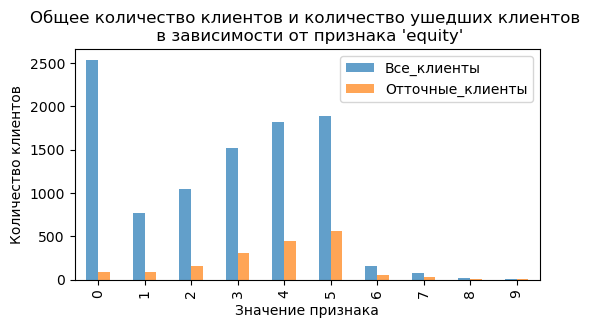

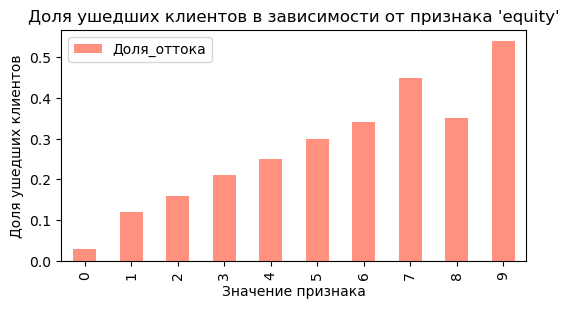

In [65]:
category_analysis('equity')

Судя по полученным диаграммам, с увеличением количества собственности клиент с большей вероятностью попадёт в отток. Изменение значения долей весьма красноречивое, указывая на сильное влияние на целевой признак; будем его учитывать в дальнейшем. Можно предположить, что при увеличении своего благосостояния клиент переходит к конкурентам, где условия более привлекательные.

   products  Все_клиенты  Отточные_клиенты  Доля_оттока
0         1         3287               230         0.07
1         2         5070               954         0.19
2         3         1021               291         0.29
3         4          457               287         0.63
4         5           18                 7         0.39


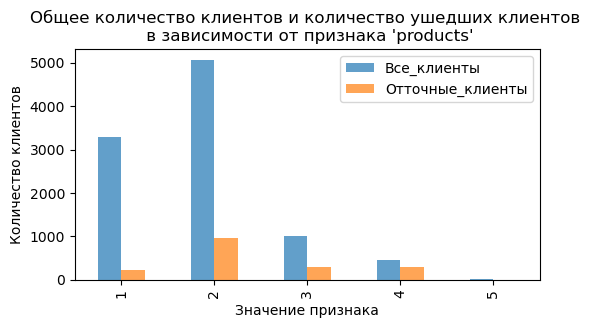

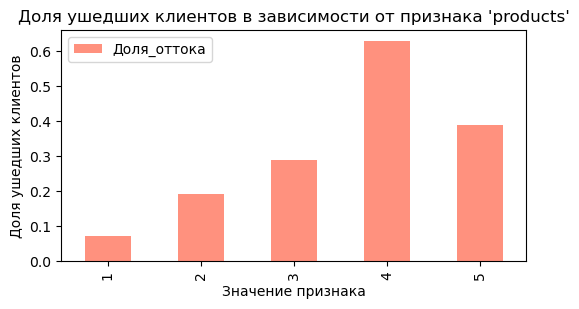

In [66]:
category_analysis('products')

Несколько неинформативными получились показатели из крайних значений количества подключённых услуг. Малое количество клиентов, относящихся к обоим категориям (с отсутствием подключённых услуг и максимально большим количеством подключённых услуг) вероятно всего демонстрируют искажённые значениям по оттоку. В остальном же можно наблюдать пропорционально прямую зависимость количества подключённых услуг от вероятности ухода клиента. Можно представить, что клиенты используют малое количество продуктов и в целом довольны ими. Но, при увеличении своих запросов, клиенты начинают пользоваться большим количеством продуктов и не находят то, что полностью удовлетворяло их запросы. После этого просходит клиенты покидают банк. Похоже, данный признак также оказывает влияние на целевую переменную, будем её учитывать при анализе.  

   credit_card  Все_клиенты  Отточные_клиенты  Доля_оттока
0            0         3149               793         0.25
1            1         6704               976         0.15


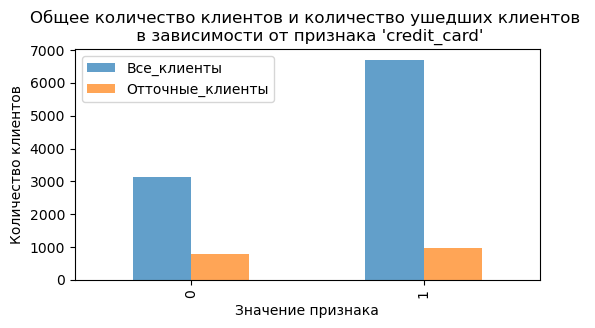

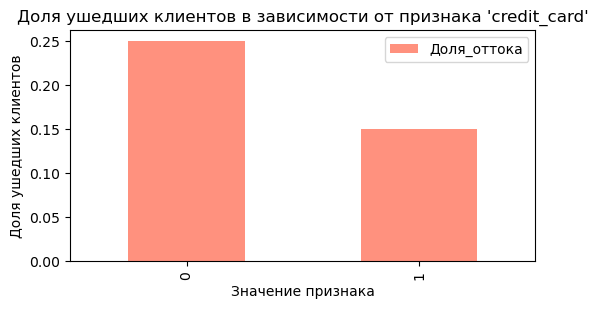

In [67]:
category_analysis('credit_card')

Большинство клиентов банка имеет кредитные карты, и данный факт оказывает влияние на уменьшение оттока клиентов. При этом разница в доле оттока между клиентами владеющими кредитными картами и без них весьма заметная, почти в два раза. Вероятно, этот признак также необходимо учитывать при анализе целевой переменной.

   last_activity  Все_клиенты  Отточные_клиенты  Доля_оттока
0              0         4713               531         0.11
1              1         5140              1238         0.24


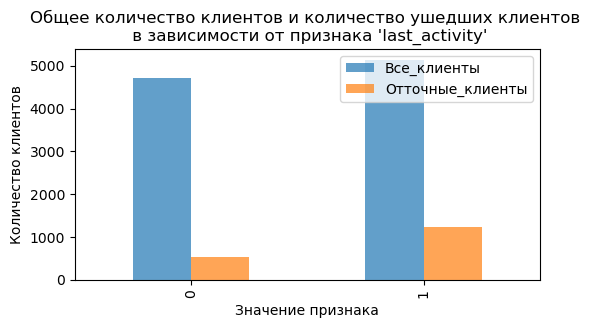

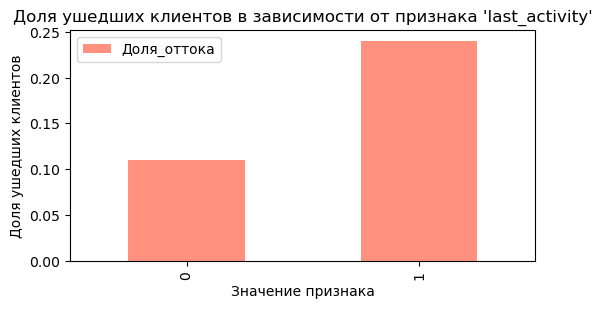

In [68]:
category_analysis('last_activity')

Среди активных клиентов присутствует значительно большая доля оттока клиентов, более чем в два раза. Условно менее активные клиенты могут пользоваться услугами банка по мере необходимости и достаточно редко, не думая о выгодности перехода к другим банкам. Для них может быть удобно или привычно использование сервисов именно нашего банка. Более активные клиенты в силу большего количества операций с деньгами, могут интересоваться какие условия предоставляют конкуренты и с готовностью переходить к ним, если может быть получена достаточная выгода. Данный признак определённо оказывает влияние на целевой признак, будем его учитывать.  
  
**Анализ количественных признаков.**  
  
Продолжим изучение предоставленных данных и их связи с оттоком клиентов и перейдём к рассмотрению количественных признаков.  
Для наилучшей оценки распределения их значений необходимы гистограммы и диаграмму размаха ("ящик с усами"). Вместе с этим будет полезно оценивать средние значения выбранных категорий признаков.  
Напишем соответствующую функцию.

In [69]:
# зададим параметры будущих гистограмм по заданным категориям
def histplot(feature, title, xlabel, ylabel, bins):
    plt.figure(figsize=(7,3))
    plt.hist(data[feature], bins, label='total_clients')
    plt.hist(data.query('churn == 1')[feature], bins, label='churn_clients')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [70]:
# а теперь зададим параменты "ящика с усами"
def boxplot(feature, title, ylabel):
    plt.figure(figsize=(12,9))
    plt.boxplot([data[feature], data.query('churn == 1')[feature]])
    plt.ylabel(ylabel)
    plt.xticks([1, 2], ['total_clients', 'churn_clients'])
    plt.show()

Закончив подготовительные действия, снова напишем фукнцию, которая будет выводить для всех клиентов и для ушедших отдельно:  
* гистограммы,
* диаграммы размаха,
* средние значения и медианы для всех клиентов и для ушедших всех количественных признаков.

In [71]:
def analysis_quantity(feature, bins):
    title = f"Распределение всех клиентов и ушедших клиентов \n в зависимости от признака '{feature}'"
    xlabel = 'Значение признака'
    ylabel = 'Количество клиентов'
    histplot(feature=feature, title=title, xlabel=xlabel, ylabel=ylabel, bins=bins)
    boxplot(feature, title, ylabel=xlabel)
    print(f'Среднее и медиана признака для всех клиентов: {round(data[feature].mean(), 1)}, \
    {round(data[feature].median(), 1)}')
    print(f'Среднее и медиана для ушедших клиентов: {round(data.query("churn == 1")[feature].mean(), 1)}, \
    {round(data.query("churn == 1")[feature].median(), 1)}')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9853 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9853 non-null   object 
 1   score          9853 non-null   int32  
 2   city           9853 non-null   object 
 3   gender         9853 non-null   object 
 4   age            9850 non-null   float64
 5   equity         9853 non-null   int64  
 6   balance        9853 non-null   float64
 7   products       9853 non-null   int64  
 8   credit_card    9853 non-null   int64  
 9   last_activity  9853 non-null   int64  
 10  est_salary     9853 non-null   float64
 11  churn          9853 non-null   int64  
 12  coded_gender   9853 non-null   int32  
dtypes: float64(3), int32(2), int64(5), object(3)
memory usage: 1000.7+ KB


Начнём с первого из количественных признаков, а именно с баллов кредитного скоринга.

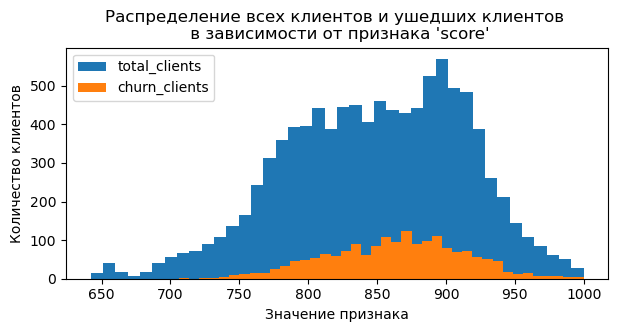

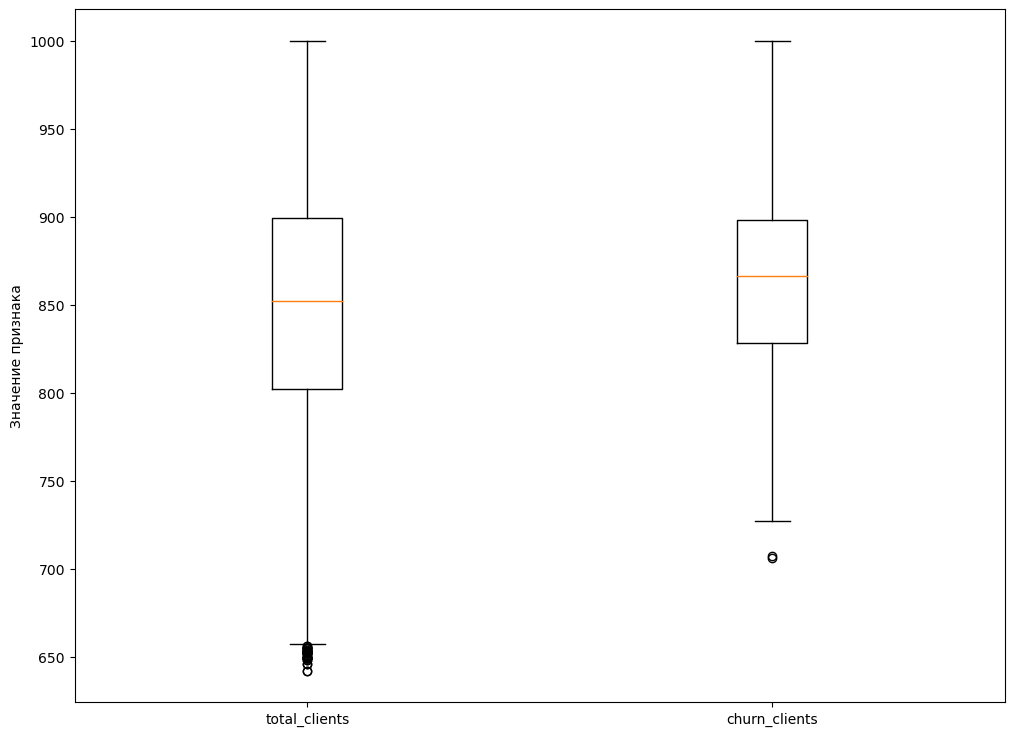

Среднее и медиана признака для всех клиентов: 848.5,     852.0
Среднее и медиана для ушедших клиентов: 863.0,     866.0


In [73]:
analysis_quantity('score', 40)

Значения баллов кредитного скоринга не демонстрируют каких-либо различий среди оттока в отличии от общего числа клиентов (по крайней мере, гистограмма распределения не позволяет выявить такие закономерности). По диаграмме размаха мы видим, что ушедшие клиенты имели несколько большие минимальные значения баллов скоринга в отличии от всех клиентов. Также обращает на себя внимание меньшее количество выбросов среди минимальных значений у ушедших клиентов. По значениям средней и медианы можно заметить, что разница между распределениями значений заключается буквально в 10-20 баллах. Возникает сомнение, оказывывает ли достаточное для измерения влияние на целевую переменную значения баллов кредитного скоринга.  
Перейдём к следующему признаку.

In [74]:
# на данном этапе нам могут помешать пропуски в значениях возраста, поскольку они не позволят отобразить распределение значений
# на диаграмме размаха. Поэтому временно удалим их датасета и построим визуализации, после чего вновь вернём их для анализа
row_age = data.copy()
# удалим строки с пропущенными значениями в столбце с возрастом клиентов.
data = data.dropna(subset=['age'])

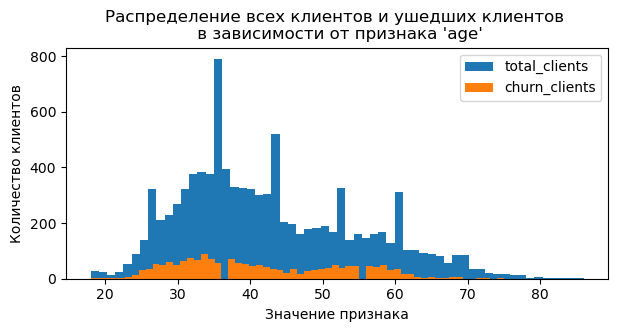

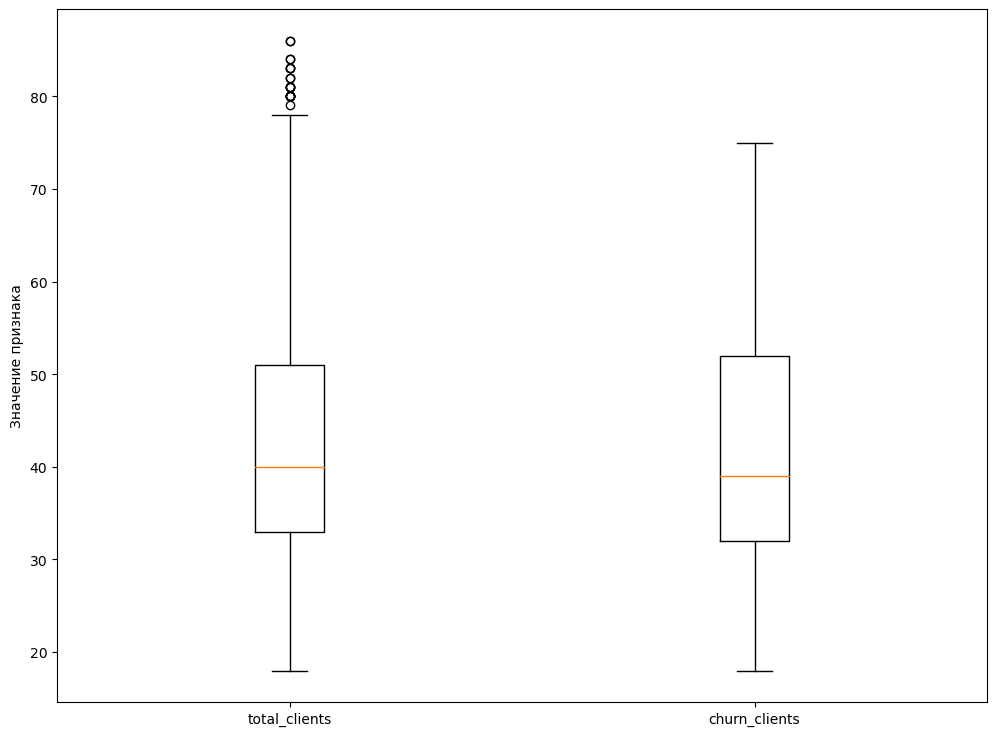

Среднее и медиана признака для всех клиентов: 42.8,     40.0
Среднее и медиана для ушедших клиентов: 41.5,     39.0


In [75]:
analysis_quantity('age', 60)

Наблюдается почти полное отсутствие различий группы ушедших клиентов от всех клиентов по значениям возраста. С большой долей вероятности, количестенный признак возраста можно исключать из последующего анализа.

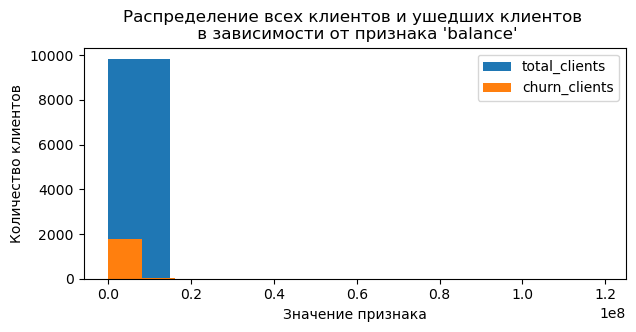

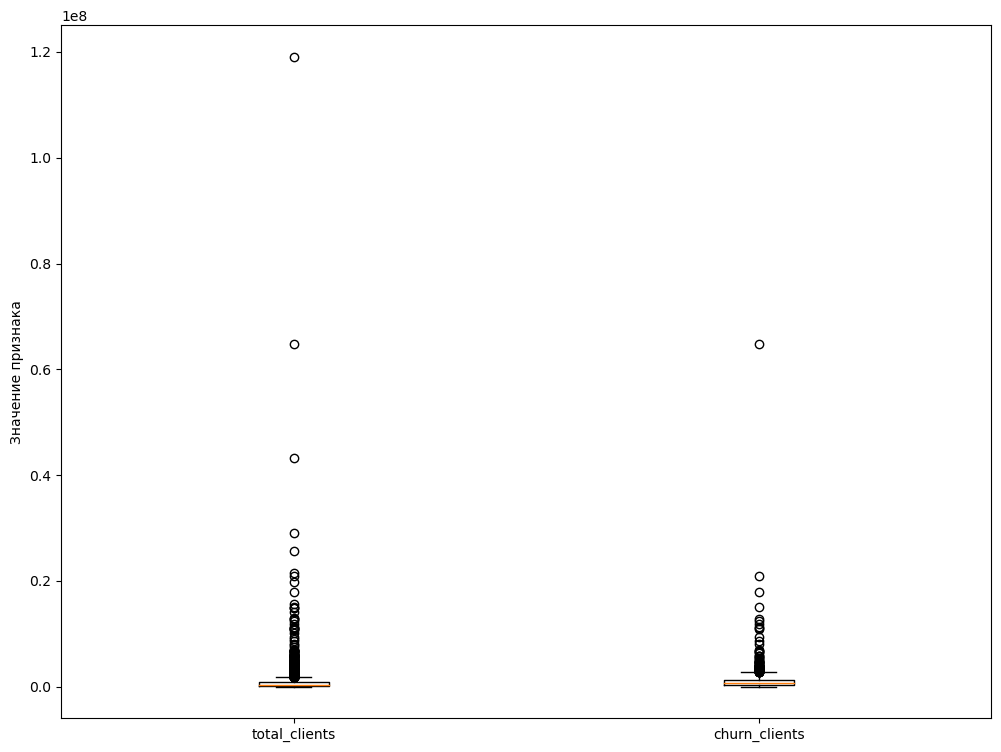

Среднее и медиана признака для всех клиентов: 667098.9,     375976.4
Среднее и медиана для ушедших клиентов: 1120965.4,     774481.2


In [76]:
# из-за аналогичной ситуации с пропусками, применим уже знакомую "заглушку"
data = row_age
row_balance = data.copy()
data = data.dropna(subset=['balance'])
analysis_quantity('balance', 8)

Построенные визуализации несколько сложны в восприятии из-за больших значений. Повторно построим диаграмму размаха, но теперь установим ограничение на ось у.

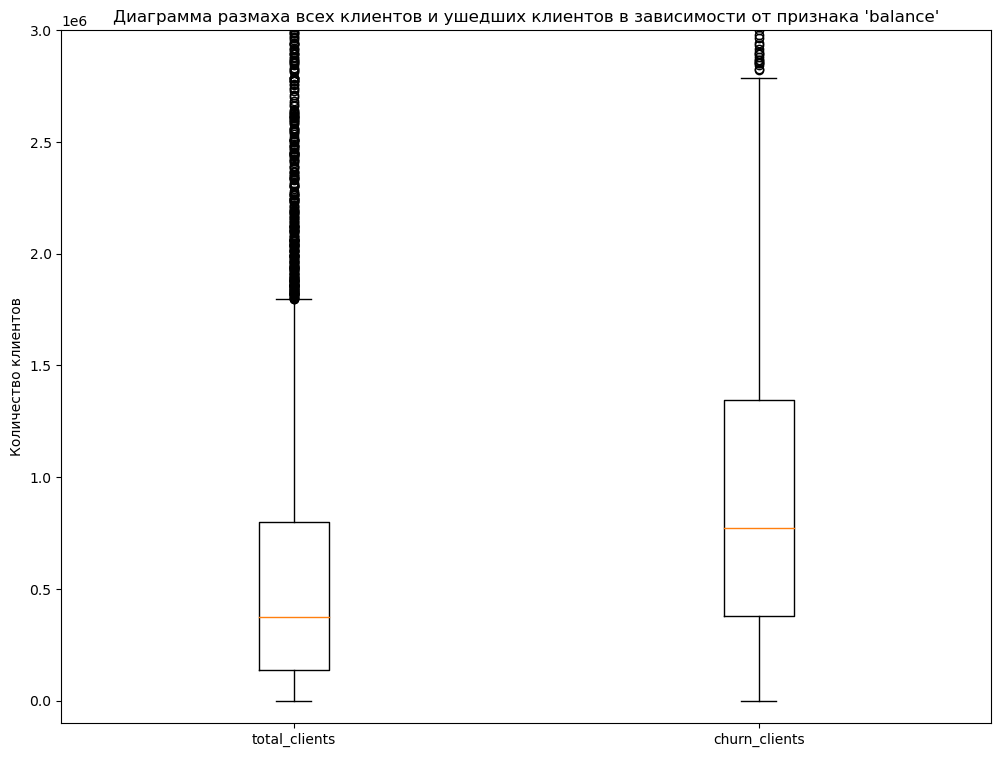

Среднее и медиана признака для всех клиентов: 667098.9, 375976.4
Среднее и медиана для ушедших клиентов: 1120965.4, 774481.2


In [77]:
plt.figure(figsize=(12,9))
plt.boxplot([data['balance'], data.query('churn == 1')['balance']], showfliers=True)
plt.ylim(-100000, 3000000)
plt.title("Диаграмма размаха всех клиентов и ушедших клиентов в зависимости от признака 'balance'")
plt.ylabel('Количество клиентов')
plt.xticks([1, 2], ['total_clients', 'churn_clients'])
plt.show()
print(f"Среднее и медиана признака для всех клиентов: {round(data['balance'].mean(), 1)}, \
{round(data['balance'].median(), 1)}")
print(f"Среднее и медиана для ушедших клиентов: {round(data.query('churn == 1')['balance'].mean(), 1)}, \
{round(data.query('churn == 1')['balance'].median(), 1)}")

Можно сказать, что ушедшие клиенты обычно имели на балансе в среднем больше денег, чем все клиенты. При этом различие в значениях средней и медианы указывает на склонность данных к большим показателям. Вероятно, значения баланса на счете клиентов могут быть полезными для анализа причин оттока клиентов.

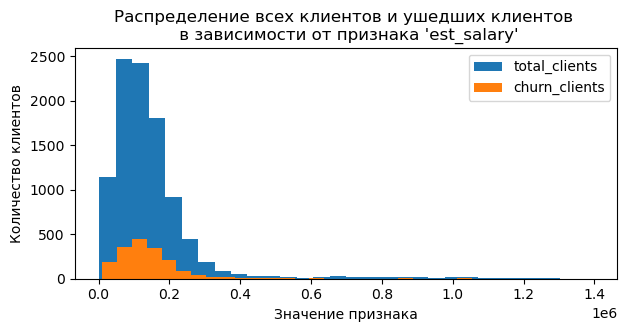

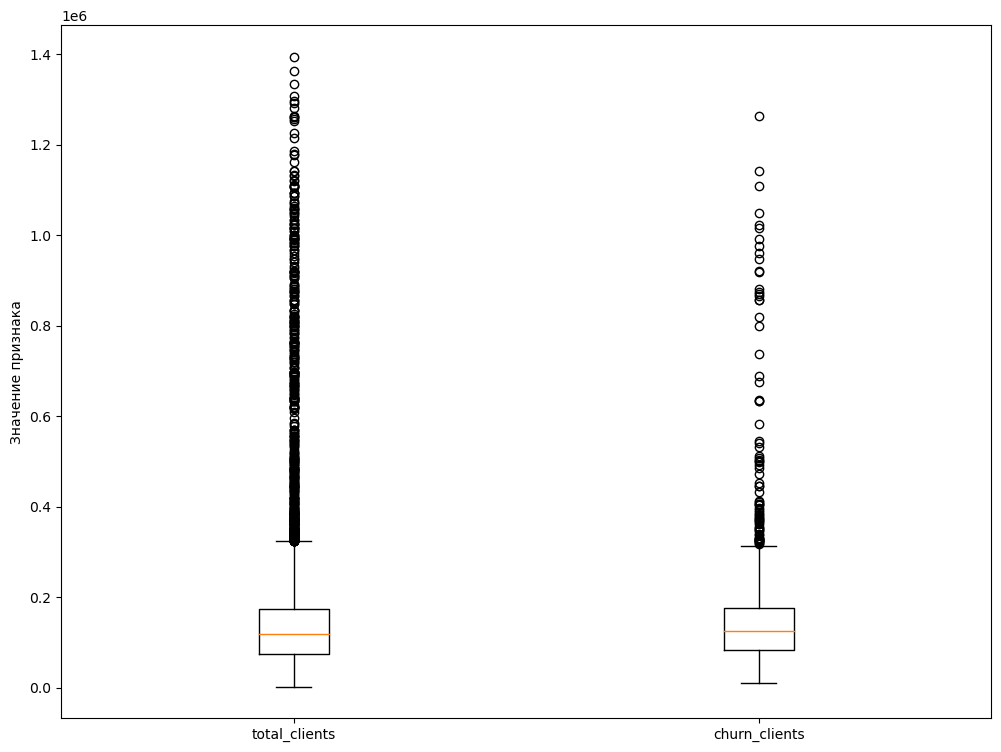

Среднее и медиана признака для всех клиентов: 147584.3,     119460.1
Среднее и медиана для ушедших клиентов: 147283.1,     125222.1


In [78]:
data = row_balance
analysis_quantity('est_salary', 30)

Значения оценочного дохода клиентов также крайне мало различаются у обеих групп клиентов. Среди различий можно выделить несколько меньшее количество выбросов среди больших значений и большая медиана у ушедших по сравнению со всеми клиентами.  
Для последующей оценки взаимной зависимости изучаемых признаков, нам будет необходимо закондировать категориальные значения столбца 'city'.

In [79]:
data = pd.get_dummies(data, columns=['city'])

При анализе визуализаций количественных признаков было отмечено их различное влияние на целевой признак. Для окончательного принятия решения о признаках, которые будут наиболее полезны для анализа изменения оттока клиентов построим корреляционную матрицу.

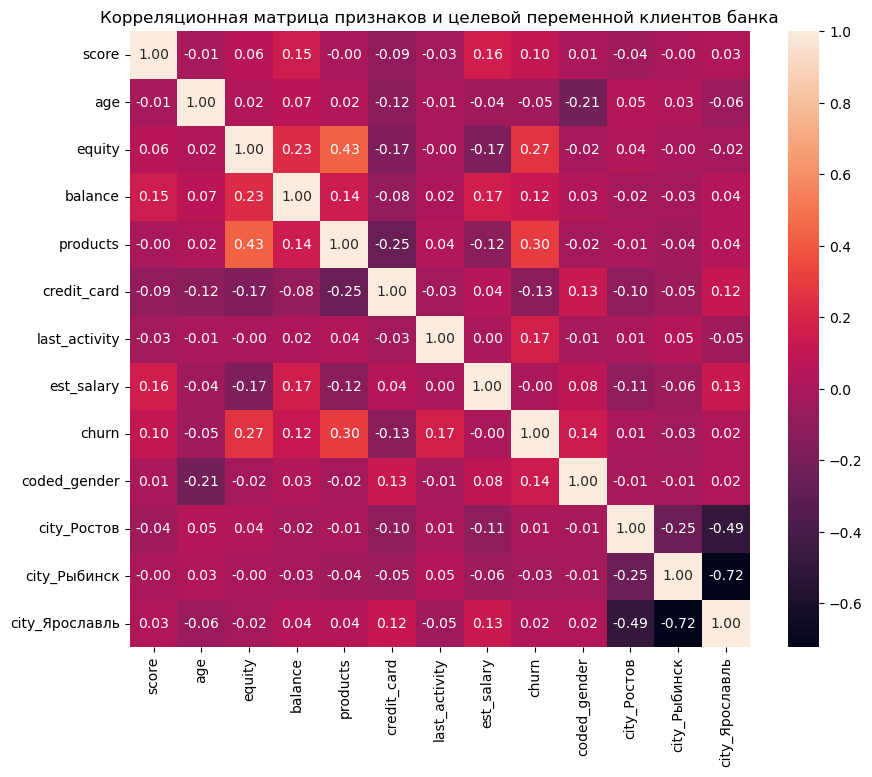

In [80]:
plt.figure(figsize=(10, 8))
plt.title('Корреляционная матрица признаков и целевой переменной клиентов банка')
sns.heatmap(data.corr(), annot = True, fmt='.2f')
plt.show()

Наименьшую взаимную зависимость с целевой переменной имеют признаки оценочного дохода клиентов ('est_salary') и возраст ('age'). Эти столбцы будет наиболее рационально удалить из выборки, тем самым повысив надежность будущей модели машинного обучения. Также удалим устраним закодированные столбцы 'gender' и 'city'. Также вероятнее   
Удалим указанные столбцы из датасета.

Теперь, отталкиваясь от выявленных закономерностей данных, постараемся сформировать наиболее типичные портреты клиентов в рамках их оттока. Для оценки портретов будем использовать значение количества клиентов в срезе, количество отточных клиентов среди них, доля оттока от общего числа клентов в данном срезе и доля оттока от общего числа клиентов.

Количество клиентов в срезе: 3051
Количество отточных клиентов по срезу: 980
Доля оттока от общего числа клиентов по срезу: 32.12
Доля оттока от общего числа клиентов по всем данным: 17.95


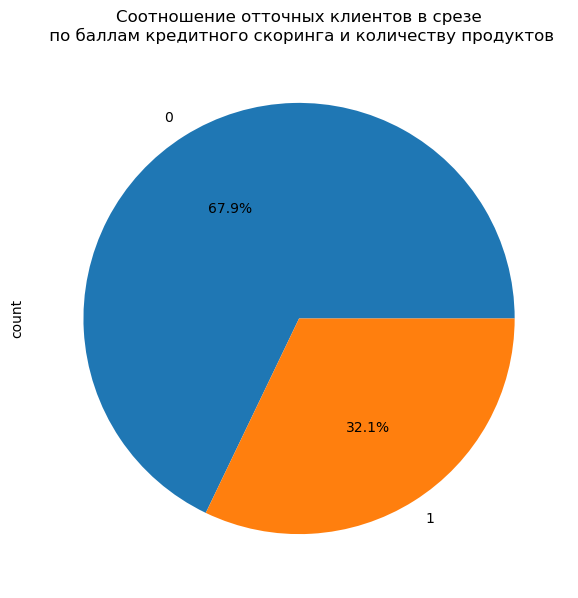

In [81]:
churn_prod = data.query('score > 850 and products >= 2') 
print(f"Количество клиентов в срезе: {len(churn_prod)}")
print(f"Количество отточных клиентов по срезу: {len(churn_prod.query('churn == 1'))}")
print(f"Доля оттока от общего числа клиентов по срезу: {round((len(churn_prod.query('churn == 1')) / len(churn_prod))*100, 2)}")
print(f"Доля оттока от общего числа клиентов по всем данным: {share_churn}")
pivot = churn_prod.pivot_table(index='churn', values='user_id', aggfunc='count')
pivot.columns = ['count']
pivot = pivot.sort_values(by='count', ascending=False)
pivot.plot(y='count', kind='pie', figsize=(7,7), autopct='%1.1f%%', legend=False)
plt.title('Соотношение отточных клиентов в срезе\n по баллам кредитного скоринга и количеству продуктов');

При отборе клиентов среди надежных кредиторов (с баллами кредитного скоринга более 850), которые пользуются несколькими (двумя и более) банковкими продуктами, можно обнаружить, что более трети из них являются отточными.

Количество клиентов в срезе: 2874
Количество отточных клиентов по срезу: 1034
Доля оттока от общего числа клиентов по срезу: 35.98
Доля оттока от общего числа клиентов по всем данным: 17.95


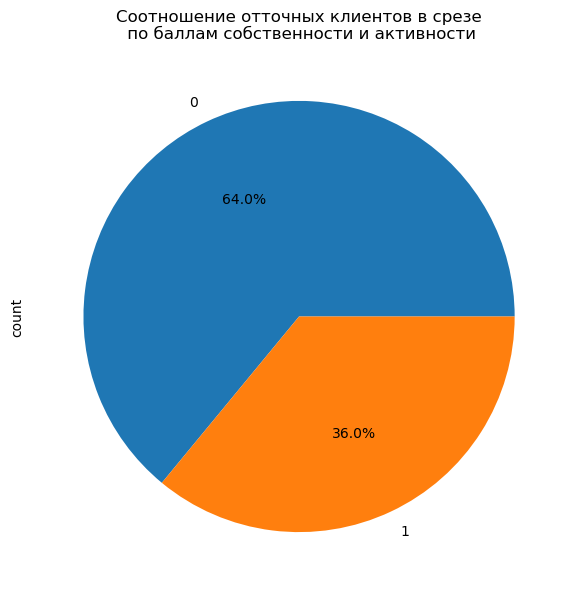

In [82]:
churn_prod = data.query('equity >= 3 and last_activity == 1')
print(f"Количество клиентов в срезе: {len(churn_prod)}")
print(f"Количество отточных клиентов по срезу: {len(churn_prod.query('churn == 1'))}")
print(f"Доля оттока от общего числа клиентов по срезу: {round((len(churn_prod.query('churn == 1')) / len(churn_prod))*100, 2)}")
print(f"Доля оттока от общего числа клиентов по всем данным: {share_churn}")
pivot = churn_prod.pivot_table(index='churn', values='user_id', aggfunc='count')
pivot.columns = ['count']
pivot = pivot.sort_values(by='count', ascending=False)
pivot.plot(y='count', kind='pie', figsize=(7,7), autopct='%1.1f%%', legend=False)
plt.title('Соотношение отточных клиентов в срезе\n по баллам собственности и активности');

Среди активных и состоятельных клиентов (имеющих от трёх и более баллов собственности) более трети будет в числе отточных.

Количество клиентов в срезе: 2701
Количество отточных клиентов по срезу: 770
Доля оттока от общего числа клиентов по срезу: 28.51
Доля оттока от общего числа клиентов по всем данным: 17.95


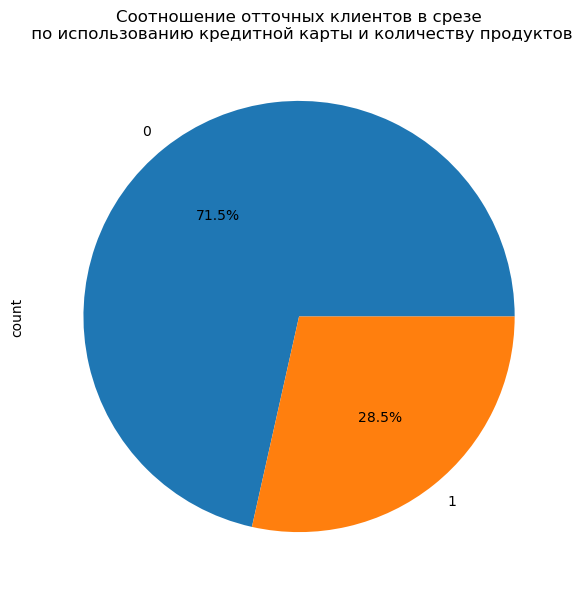

In [83]:
churn_prod = data.query('credit_card == 0 and products > 1') 
print(f"Количество клиентов в срезе: {len(churn_prod)}")
print(f"Количество отточных клиентов по срезу: {len(churn_prod.query('churn == 1'))}")
print(f"Доля оттока от общего числа клиентов по срезу: {round((len(churn_prod.query('churn == 1')) / len(churn_prod))*100, 2)}")
print(f"Доля оттока от общего числа клиентов по всем данным: {share_churn}")
pivot = churn_prod.pivot_table(index='churn', values='user_id', aggfunc='count')
pivot.columns = ['count']
pivot = pivot.sort_values(by='count', ascending=False)
pivot.plot(y='count', kind='pie', figsize=(7,7), autopct='%1.1f%%', legend=False)
plt.title('Соотношение отточных клиентов в срезе\n по использованию кредитной карты и количеству продуктов');

Среди клиентов, не имеющих кредитные карты, но использующие какой-либо другой продукт банка, чуть больше четвёртой части будет отточных.  
Теперь для увеличения достоверности исследовательского анализа, удалим колонки, данные которых имеют малое влияние на целевую переменную.

Количество клиентов в срезе: 1225
Количество отточных клиентов по срезу: 692
Доля оттока от общего числа клиентов по срезу: 56.49
Доля оттока от общего числа клиентов по всем данным: 17.95


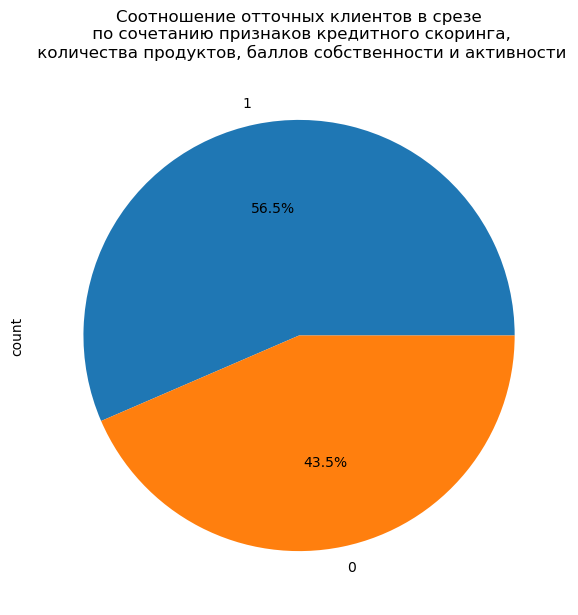

In [84]:
churn_prod = data.query('score > 850 and products >= 2 and equity >= 3 and last_activity == 1') 
print(f"Количество клиентов в срезе: {len(churn_prod)}")
print(f"Количество отточных клиентов по срезу: {len(churn_prod.query('churn == 1'))}")
print(f"Доля оттока от общего числа клиентов по срезу: {round((len(churn_prod.query('churn == 1')) / len(churn_prod))*100, 2)}")
print(f"Доля оттока от общего числа клиентов по всем данным: {share_churn}")
pivot = churn_prod.pivot_table(index='churn', values='user_id', aggfunc='count')
pivot.columns = ['count']
pivot = pivot.sort_values(by='count', ascending=False)
pivot.plot(y='count', kind='pie', figsize=(7,7), autopct='%1.1f%%', legend=False)
plt.title('Соотношение отточных клиентов в срезе\n по сочетанию признаков кредитного скоринга,\n количества продуктов, баллов собственности и активности');

Если отобрать достаточно состоятельных (с баллами собственности от 3 и выше) и надежных клиентов (с баллами кредитного скоринга более 850 баллов), активно пользульзующихся продуктами банка (количество подключённых продуктов более 2), то более 50% из них будет отточными.

In [85]:
clear_data = data.drop(['age', 'gender', 'est_salary', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль'], axis=1).reset_index(drop=True)

In [86]:
# рассмотрим полученный датасет
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9853 entries, 0 to 9852
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9853 non-null   object 
 1   score          9853 non-null   int32  
 2   equity         9853 non-null   int64  
 3   balance        9853 non-null   float64
 4   products       9853 non-null   int64  
 5   credit_card    9853 non-null   int64  
 6   last_activity  9853 non-null   int64  
 7   churn          9853 non-null   int64  
 8   coded_gender   9853 non-null   int32  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 615.9+ KB


In [87]:
clear_data.head()

,user_id,score,equity,balance,products,credit_card,last_activity,churn,coded_gender
0,183012,850,1,59214.82,2,0,1,1,0
1,146556,861,5,850594.33,3,1,0,0,0
2,120722,892,0,135851.53,1,1,1,0,0
3,225363,866,5,1524746.26,2,0,1,1,0
4,157978,730,5,174.00,1,1,0,1,1


Подведём предварительный итог на данном этапе.  
1) Нами был произведён анализ категориальных и количественных признаков при использовании методов визуализации.  
2) Удалось получить представление чем отличаются данные у отточных клиентов по сравнению со всеми клиентами.  
3) Была построена корреляционная матрица признаков и целевой переменной клиентов банка, благодаря которой были установлена наиболее явные взаимозависимости в данных.  
4) Были выделены портреты клиентов, среди которых значительную часть занимают отточные.
5) Признаки, которые имели малое влияние на целевую переменную, были удалены из датасета.  


## Определение групп клиентов

**Прогнозирование оттока**  
Предположим, что заказчику может потребоваться с некоторой переодичностью узнавать по свежей выборке какие клиенты могут попасть в отток. Эту задачу можно возложить на модель машинного обучения. Проверим как она справится в этой задачей на данной выборке клиентов. Определить входит ли клиент в отток или нет является бинарной задачей с обученем. Для этого можно использовать две моделели – одну на основании логистической регрессии (Logistic Regression), вторую – на основе случайного леса (RandomForestClassifier). Таким образом, мы сравним две модели и определим наиболее подходящую. Основывать свой выбор будем на их метрики и выберем ту, у которой они будут лучше.  
Рассматривать будем следующие метрики:  
1. Матрица ошибок, которая отобразит количество верных прогнозов 0 ('TN') и 1 ('TP'), и количество неверных прогнозов 0 ('FN') и 1 ('FP'). По матрице ошибок мы сможем оценить, есть ли у алгоритма перекос в сторону позитивного или негативного значения целевой переменной;  
2. Accuracy – долю правильных ответов, которую вычисляют по формуле:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
Эта метрика лучше всего работает для сбалансированных классов. В нашем случае, когда ушедших клиентов примерно в четыре с половиной раза меньше, она не вполне подойдёт.  
3. Precision – доля правильных ответов среди прогнозов значений 1 ('P'). Рассчитывается по формуле:  
Precision = TP / (TP + FP)  
Эта метрика важна, когда в бизнесе факт отнесения к классу 1 стоит ресурсов. В нашем случае эта метрика характеризует риск дать специальное предложение тому клиенту, который не собирается от нас уходить.  
4. Recall – доля правильно выявленных значений. 1 ('P'). Рассчитывается по формуле:  
Recall = TP / (TP + FN)  
Эта метрика направлена на минимизацию противоположных рисков – избежать того, что мы не выявим клиента, который уйдёт от нас. Для банковского бизнеса это ключевая метрика. Поэтому будем делать вывод о лучшей модели именно по этой метрике.  
В действительности, выбор метрики для определения лучшей обучающей модели можно сделать на основе запроса от заказчика. Поскольку исследуется отток клиентов, то вполне логично предположить, что данная проблема является приоритетной для банка. Помочь с этим может метрика Recall. Если запрос клиента изменится на сокращение расходов, то ориентацию можно изменить на Precision.

In [88]:
# разделим выборку на признаки и целевую переменную
X = clear_data.drop('churn', axis=1)
y = clear_data['churn']

In [89]:
# полученные признаки в свою очередь поделим на обучающую и валидацинную в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Внимательнее рассмотрим полученные наборы данных.

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
y_test.shape[0]

(7882, 8)
(1971, 8)
7882


1971

Всего у модели будет 7882 строки по 8 признаков чтобы обучиться предсказывать оттока клиентов и 1971 строка по 8 признаков чтобы показать успешность полученной подели. В обоих случаях данных более чем достаточно.  
Для обучения модели LogisticRegressor необходимо маштабировать признаки и привести их к стандартному виду (со средним 0 и стандартным отклонением 1). Для этого воспользуемся моделью StandardScaler, обучим её на обучающей выборке признаков и затем маштабируем значение признаков в обучающей и валидационной выборке.

In [91]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Напишем функцию, которая будет принимать на вход алгоритм модели для обучения. Затем, используя тестовые стандартизированные данные и тестовые целевые переменные, обучим модель. После этого, используя валидационные данные и тестовые целевые переменные, сделаем прогноз. Наконец, используя валидационные стандартизированные данные, сделаем еще один прогноз. На выходе функция вернет матрицу ошибок модели и метрики accuracy, precision и recall.

In [92]:
def confusion_matrix(model, model_name):
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot = True, fmt='.0f')
    plt.title(f'Матрица ошибок модели {model_name}')
    plt.xlabel('Прогноз модели')
    plt.ylabel('Истинное значение')
    plt.show()
    print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 3))
    print('Precision:', round(metrics.precision_score(y_test, y_pred), 3))
    print('Recall:', round(metrics.recall_score(y_test, y_pred), 3))

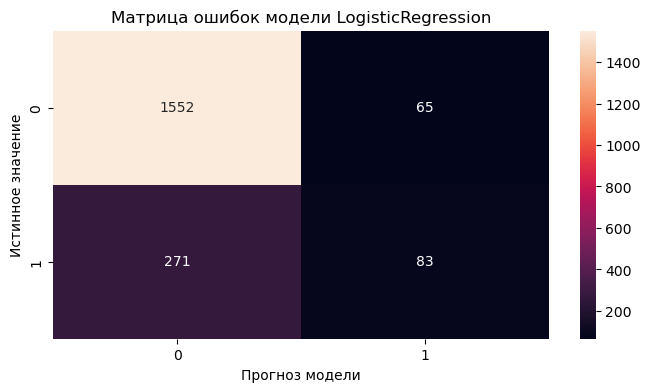

Accuracy: 0.83
Precision: 0.561
Recall: 0.234


In [93]:
confusion_matrix(LogisticRegression(random_state=0), 'LogisticRegression')

Модель логистической регрессии верно определенила 1552 оставшихся клиентов и 83 ушедшего клиента, ошиблась для 65 клиентов, которые остались и 271 клиента, которые ушли.  
Аналогично обучим и протестируем RandomForestClassifier.

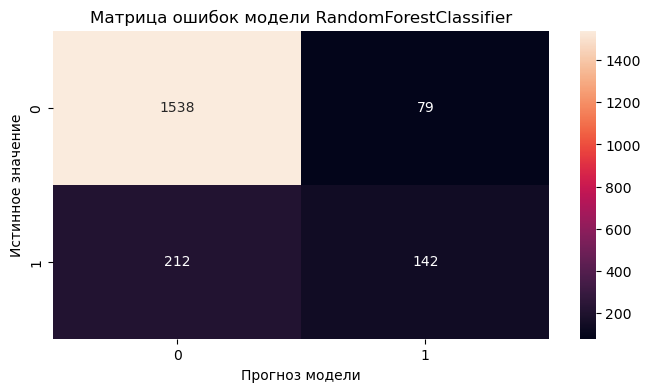

Accuracy: 0.852
Precision: 0.643
Recall: 0.401


In [94]:
confusion_matrix(RandomForestClassifier(n_estimators = 100, random_state=0), 'RandomForestClassifier')

Модель случайного леса верно определила 1538 оставшихся клиентов и 142 ушедшего клиента, ошиблась для 79 клиентов, которые остались и 212 клиентов, которые ушли.  
В данном случае мы можем наблюдать, что если возникнет задача предсказать отток клиентов, то лучше всего будет выбрать модель случаного леса. К тому же, метрика recall у случайного леса выше почти в два раза, чем модели логистической регрессии; также чуть выше метрика precision. Также обе модели явно ориентированы для определения надёжных клиентов, которые с высокой вероятностью не уйдут. Использовать полученную модель для предсказания оттока (как в случае данной работы) не вполне целесообразно.  
  
**Кластеризация клиентов**  
Далее нам нужно определить группы клиентов, которые были бы не малочисленными и обладали характерными для своей группы признаками. Чтобы определить количество таких сегментов, воспользуемся агломеративной иерархической кластеризацией. Импортируем модель класса linkage() и передадим ей все стандартизированные признаки клиентов, затем визуализируем получившиеся связи между клиентами в виде дендрограммы.

In [95]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method = 'ward')

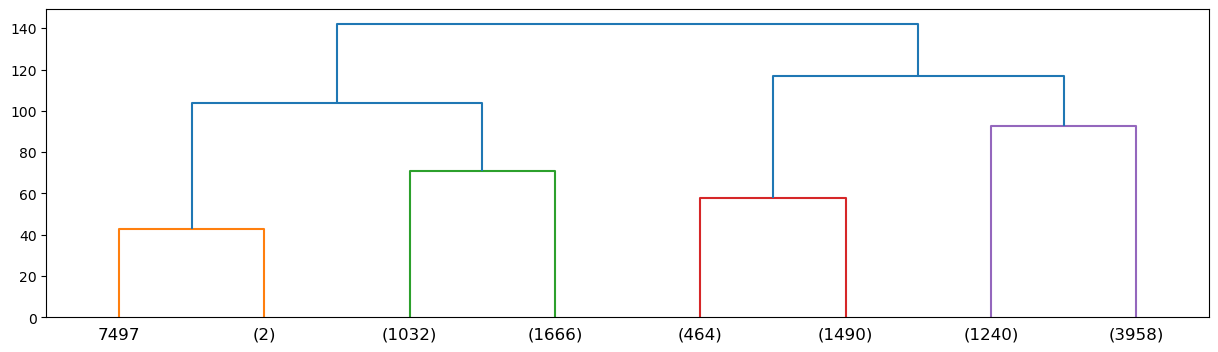

In [96]:
plt.figure(figsize=(15, 4))
dendrogram(linked, orientation='top', truncate_mode='level', p=2)
plt.show()

Модель предложила разделение на 4 кластера. Для целей данной работы данное число вполне подходит. Однако численность кластеров сильно различается. Таких больших различий лучше избегать.  
Разделим выборку на 4 кластера с помощью алгоритма K-Means, создадим модель и применим её к стандартизированным признакам. 

In [97]:
km = KMeans(n_clusters=4, random_state=0)
labels = km.fit_predict(X_st)

Рассмотрим полученные кластеры, проверим их количество и название.

In [98]:
set(labels)

{0, 1, 2, 3}

Сохраним полученные кластеры и столбце 'label'. Рассмотрим полученный результат.

In [99]:
clear_data['label'] = labels
clear_data.head()

,user_id,score,equity,balance,products,credit_card,last_activity,churn,coded_gender,label
0,183012,850,1,59214.82,2,0,1,1,0,1
1,146556,861,5,850594.33,3,1,0,0,0,0
2,120722,892,0,135851.53,1,1,1,0,0,3
3,225363,866,5,1524746.26,2,0,1,1,0,1
4,157978,730,5,174.00,1,1,0,1,1,2


Добавление столбца прошло успешно.  
Подведём предварительный итог по данному этапу.  
1) Мы определились в выбором моделей для определения оттока клиентов и выделили метрики, которые смогут определить какая модель справляется с задачей более эффективно.  
2) Подготовив данные и обучив обе модели, нами было определено, что более эффективной является модель RandomForestClassifier, чья метрика recall составляет 0,401.  
3) Также нами была произведена кластеризация клиентов на основании их данных. Число оптимальных кластеров было нами определено в количестве четырёх.  
4) Полученные кластеры были успешно добавлены с датасет.

## Формулирование типичных групп клиентов

**Анализ кластеров клиентов**  
Рассмотрим какое количество клиентов попало в каждый кластер, а также узнаем средние значения каждого столбца.

In [100]:
print(clear_data.groupby('label').agg({'user_id': 'count'}))
clear_data_grouped = clear_data.groupby('label').mean().reset_index()
clear_data_grouped

       user_id
label         
0         3192
1         2708
2         1945
3         2008


,label,score,equity,balance,products,credit_card,last_activity,churn,coded_gender
0,0,855.339599,4.089912,8.893144e+05,2.129073,1.000000,0.458647,0.233709,0.503759
1,1,851.718612,3.600812,1.054530e+06,2.326071,0.000739,0.542467,0.289143,0.387001
2,2,766.874036,1.313111,2.761121e+05,1.514139,0.975835,0.591774,0.096144,0.593316
3,3,912.307271,0.276394,1.700841e+05,1.179283,0.802789,0.525896,0.026394,0.557271


Для оценки количественного соотношения представителей разных кластеров наиболее оптимальным решением будет использование круговой диаграммы.

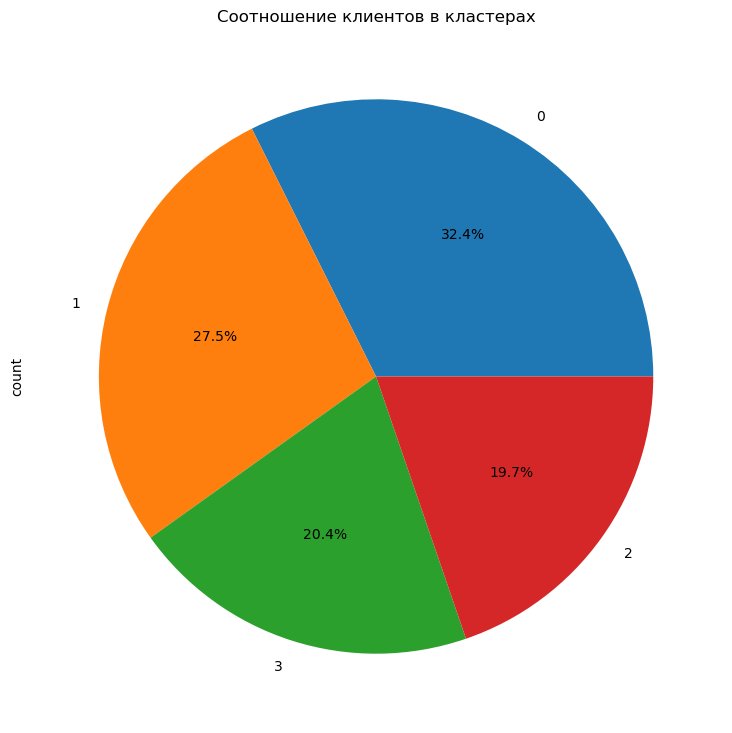

In [101]:
clusters = clear_data.pivot_table(index='label', values='user_id', aggfunc='count')
clusters.columns = ['count']
clusters = clusters.sort_values(by='count', ascending=False)
clusters.plot(y='count', kind='pie', figsize=(9, 9), autopct='%1.1f%%', legend=False)
plt.title('Соотношение клиентов в кластерах');

Больше всего клиентов из кластера 0 и 1. Немного уступают им по численности кластера 2 и 3.  
Клиенты были разделены на кластеры, которые максимально близки по численности друг к другу. Разницу в средних значениях разных кластеров будет лучше воспринимать визуально, поэтому напишем функцию, которая построит данные визуализации.

In [102]:
def cluster_barplot(feature):
    clear_data_grouped.plot(x='label', y=feature, kind='bar', figsize=(8,3), alpha=.7, legend=True)
    plt.title(f"Среднее значение признака '{feature}' в кластерах")
    plt.xlabel('Кластер')
    plt.ylabel('Значение признака')
    plt.show()

Рассмотрим распределение оттока в каждом кластере клиентов.

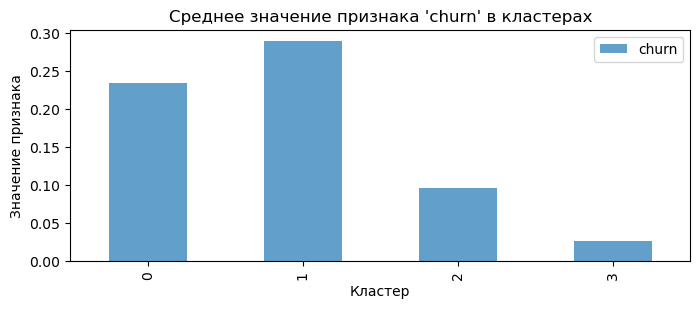

In [103]:
cluster_barplot('churn')

In [104]:
clear_data

,user_id,score,equity,balance,products,credit_card,last_activity,churn,coded_gender,label
0,183012,850,1,59214.82,2,0,1,1,0,1
1,146556,861,5,850594.33,3,1,0,0,0,0
2,120722,892,0,135851.53,1,1,1,0,0,3
3,225363,866,5,1524746.26,2,0,1,1,0,1
4,157978,730,5,174.00,1,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
9848,120553,814,1,78144.65,1,0,1,0,1,2
9849,139170,894,0,135851.53,1,1,0,0,1,3
9850,115639,903,0,135851.53,2,1,1,0,1,3
9851,148700,777,3,865457.97,3,0,1,0,0,1


Наиболее подверженны оттоку кластеры 1 и 0. Клиенты в кластере 2 имеют среднюю поверженность оттоку, кластер 3 - наиболее надежные из наших клиентов.  
Для удобства составим списки категориальных и количественных признаков.

In [105]:
categorical_features = ['credit_card', 'last_activity', 'coded_gender', 'products']
numerical_features = ['score', 'equity', 'balance']

Сначала построим визуализации категориальных признаков.

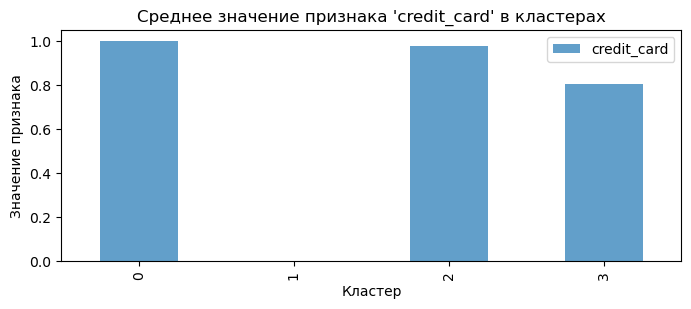

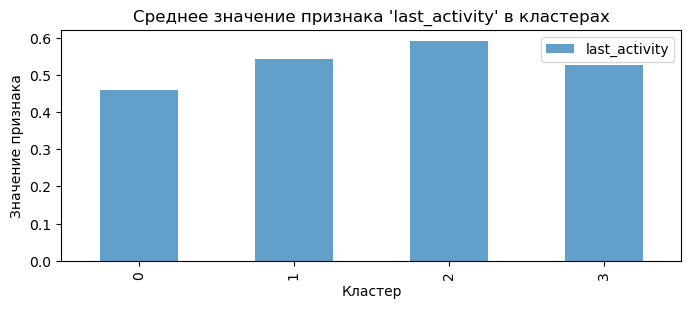

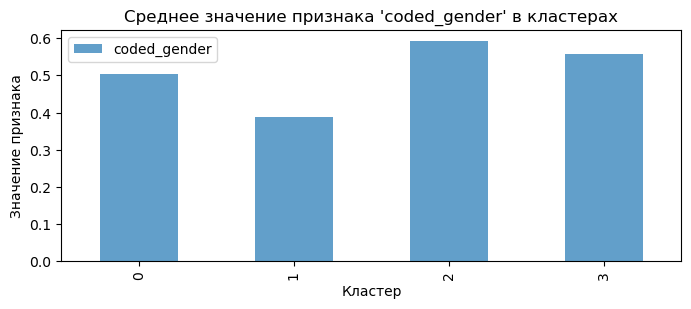

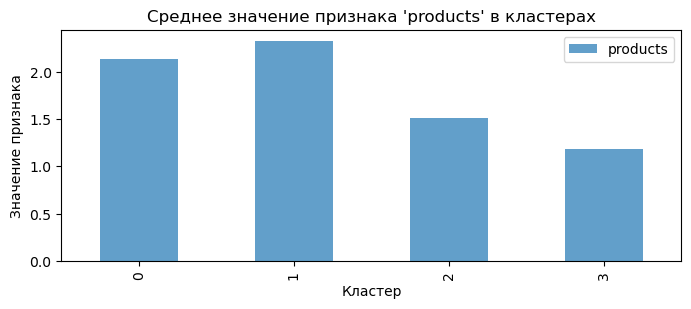

In [106]:
for feature in categorical_features:
    cluster_barplot(feature)

Количественные признаки удобнее изучать по диаграммам размаха. Напишем функцию для построения диаграмм.

In [107]:
def cluster_boxplot(feature):
    plt.figure(figsize = (8, 3))
    plt.boxplot((clear_data.query('label == 0')[feature],
                clear_data.query('label == 1')[feature],
                clear_data.query('label == 2')[feature],
                clear_data.query('label == 3')[feature]))
    plt.title(f"Распределение клиентов в кластерах в зависимости \n от признака '{feature}')")
    plt.xlabel('Кластер')
    plt.ylabel('Значение признака')
    plt.xticks([1, 2, 3, 4], [0, 1, 2, 3])
    plt.show()

Передадим функции список с количественными признаками.

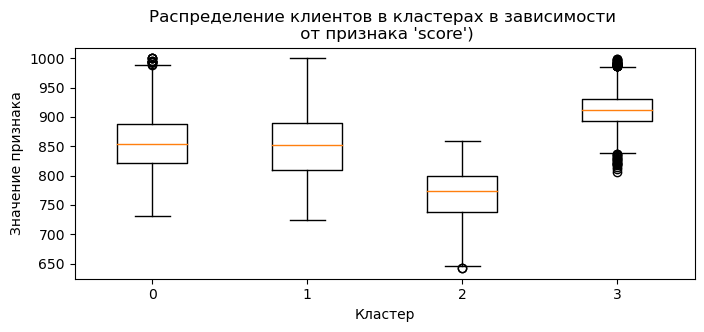

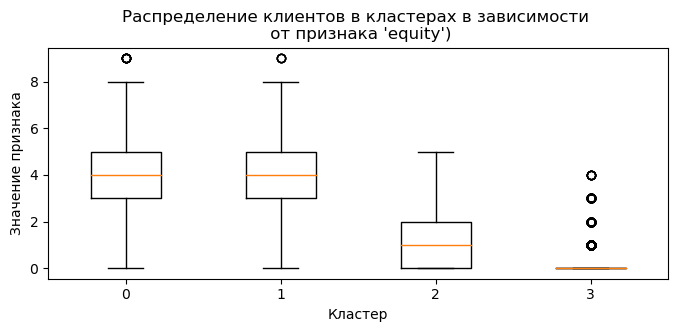

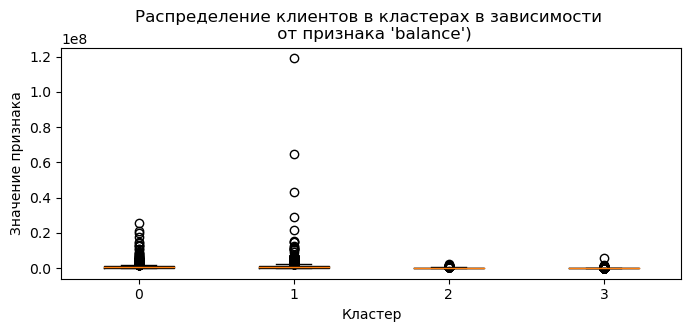

In [108]:
for feature in numerical_features:
    cluster_boxplot(feature)

Последняя диаграмма размаха значений баланса вновь получилась малоинформативной из-за большого количества выбросов. Постараемся повысить её информативность, устранив обозначение выбросов.

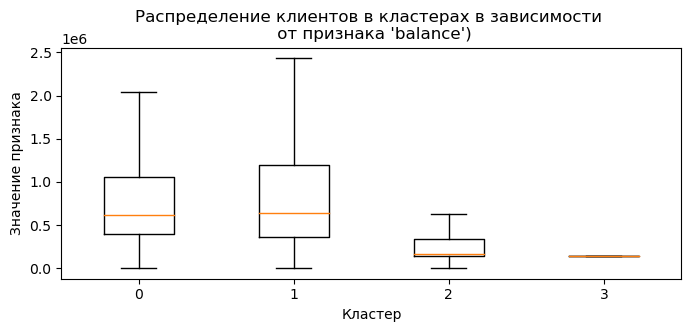

In [109]:
plt.figure(figsize = (8, 3))
plt.boxplot((clear_data.query('label == 0')['balance'],
            clear_data.query('label == 1')['balance'],
            clear_data.query('label == 2')['balance'],
            clear_data.query('label == 3')['balance']), showfliers=False)
plt.title(f"Распределение клиентов в кластерах в зависимости \n от признака '{'balance'}')")
plt.xlabel('Кластер')
plt.ylabel('Значение признака')
plt.xticks([1, 2, 3, 4], [0, 1, 2, 3])
plt.show()

Теперь суммируем все полученные данные по кластерам и постараемся выдвинуть по ним умозаключения.  
  
Начнем описание полученных кластеров с того, в котором целевая переменная выражена наиболее сильно. В данном случае это кластер 1. Рассмотрим каждый новый кластер в контексте динамики изменения рассматриваемых признаков.  
  
Для клиентов с максимальным риском оттока (кластер 1) характерно следующее:  
1. Около 30% клиентов в скором времени покинут нас.  
2. Ни один из клиентов не имеет кредитных карт.  
3. Большинство клиентов являются женщинами.  
4. У данных клиентов подключено в среднем 4 продукта.  
  
В группе клиентов с максимальным риском ухода чаще всего состоят женщинам, которые активно используют банковские продукты, но не кредитные карты. Они достаточно состоятельны: наибольшие аномальные значения баланса относятся именно к этим клиентам. Также следует отметить, что для данного кластера (как и для кластера 0) характерно высокое значение баллов собственности, что также подтверждает высокую состоятельность данных клиентов. Похоже, что большое количество подключенных продуктов и желание прекратить отношения с банком демонстрируют недовольство сервисами, которые предоставляет банк. Возможно, вся масса подключенных продуктов не удовлетворяет запросы этих клиентов. Данный кластер наиболее подходит для того, чтобы стать главной целью специальных предложений и особых выгодных условий от банка, поскольку шанс оттока у этих клиентов наиболее высокий. Приоритет работы с ними следует обозначить как крайне высокий.  
  
Для клиентов с повышенным риском оттока (кластер 0) характерны следующие особенности их группы:  
1) Каждый клиент из этого кластера имеет кредитную карту.  
2) Менее половины (45%) клиентов являются активными пользователями.  
3) Большинство клиентов данного кластера пользуются двумя продуктами от банка.  
Главной особенностью группы клиентов с повышенным риском оттока, которой нет у других, является низкая активность и высокая концентрация аномальных значений баланса на счете. Как и рассмотренный ранее, на этом кластере также следует сосредоточить внимание, стараясь различными способами повысить лояльность этих клиентов. Приоритет работы с ними можно определить как высокий.  
  
Для клиентов с умеренным риском оттока характерно следующее:  
1) Около 60% клиентов являются активными, то есть они регулярно пользуются услугами банка.  
2) Чуть более половины клиентов - мужчины, примерно 60%.  
3) Как правило, эти клиенты используют только один подключенный продукт.  
Клиенты с умеренным риском оттока имеют наименьшие значения на балансе и баллы кредитного скоринга. В большинстве случаев они находятся в диапазоне от 750 до 800, с медианой около 775. Мужчин среди этих клиентов больше, чем женщин, но разница не значительна. Часто единственным подключенным продуктом является кредитная карта, которой они часто пользуются. Эти клиенты не требуют особого внимания в контексте борьбы с оттоком. Можно периодически проверять, не перешли ли они в другой кластер. Если одновременно увеличилось количество баллов собственности, кредитного скоринга и появились аномально большие значения баланса, то это будет сигналом для повышенного внимания к ним.  
  
Для клиентов с низким риском ухода (кластер 3) характерно следующее:

1) Эти клиенты используют только один подключенный продукт, чаще всего это кредитная карта.
2) Клиенты из этого кластера имеют самый высокий балл кредитного скоринга с медианой более 900. Также для них характерны множественные выбросы среди низких (около 800 баллов) и максимальных значений (около 1000).
3) Эти клиенты чаще всего не имеют баллов собственности.  
Клиенты с низким шансом оттока обычно имеют официальную работу с фиксированными выплатами, что делает их идеальными кандидатами для получения кредита с высокими предварительными шансами на его возврат. Кроме того, они часто оформляют кредитную карту, так как их значения баланса обычно ниже, чем у других клиентов. Данные клиенты являются надежными партнерами банка, приносящими стабильный и надежный доход без риска оттока. В связи с этим, таким клиентам требуется минимальное внимание в рамках борьбы с оттоком.  
  
На данном этапе мы провели следующие действия:
  
1. Мы проверили возможность прогнозирования оттока клиентов с помощью обученной модели. Лучше всего для этого подошла модель RandomForestClassifier (recall = 0.401). Однако, более точно модель определяет клиентов, которые останутся. При этом, она ошибается в отношении отточных клиентов чаще, чем определяет их правильно (212 ошибок против 142 верных определений). Таким образом, на данную модель можно было бы возложить определение надежности клиентов, но поскольку такого запроса у заказчиков не было, следует признать, что машинное обучение мало полезно при данном наборе данных и в конкретной работе.  
  
2. Мы прокластерилизовали весь набор данных с помощью агломеративной иерархической кластеризации и определили оптимальное количество кластеров, на которое можно разделить весь набор данных. Было принято решение разделить данные на 4 кластера.  
  
3. С помощью алгоритма K-Means мы разделили выборку на 4 кластера, создали модель и применили её к стандартизированным признакам, получив новый категориальный признак отнесения каждого клиента к своему классу отточности.  
  
4. Был изучен каждый кластер и составлена характерная группа каждого из них, были подчеркнуты отличия каждого кластера от других, выделены индивидуальные особенности. Также была составлена приоритезация, по которой к отдельным кластерам предлагалось оказывать повышенное внимание для избежания их оттока.  

## Методы противодействия оттоку и их актуальные сроки применения.

Согласно полученным кластерам, в выборке представлены разные клиенты, люди из разных социальных слоев, которые имеют свои интересы и цели взаимодействия с банком.  
Одним из количественных факторов, который наглядно показывает разницу между кластерами, является показатель "баллы собственности" (equity). Под имуществом могут пониматься не только личные автомобили и квартиры, но и рабочий транспорт, арендованные помещения под производство или офисы и другие объекты. То есть, с банком часто взаимодействуют владельцы малого и среднего бизнеса.  
  
Согласно данным **кластера 1**, можно увидеть, что эти клиенты являются достаточно активными (активнее их только клиенты из кластера 2, которые имеют умеренный риск оттока), имеют большое количество подключенных продуктов (максимальное среди средних значений других кластеров), но при этом не пользуются кредитными картами.  
В таком случае можно предположить, что клиенты с максимальным риском оттока (1 кластер) - это предприниматели, которые имеют счета, по которым производятся расчеты с заказчиками; которые пользуются денежными переводами, возможно, имеют накопительные вклады и пользуются аналитическими сервисами.  
Не каждый бизнес, особенно среди малых и средних, имеет достаточный запас прочности, чтобы игнорировать убыточное партнерство. Обычно, подводя итоги за месяц, клиент уже может извлечь для себя зоны роста во взаимодействии с банком и начать искать альтернативные варианты. Добиться мнимой монополии в современном банковском секторе очень сложно, а реальная монополия законодательно невозможна. Поэтому можно быть уверенным, что скоро клиент найдет множество предложений, и одно из них точно его заинтересует (учитывая, что к настоящему времени у него уже должно быть некоторое недовольство определенным аспектом отношений с банком).  
Учитывая изложенное, срок применения мер, которые призваны повысить лояльность клиента к банку, должен быть **не больше 30 дней**. Эти меры не должны показать ему реальный доход от взаимодействия с банком, но хотя бы продемонстрировать их перспективность в будущем. В дальнейшем было бы прекрасным решением разработать программу лояльности, когда более активным или давним клиентам будут предлагаться более выгодные условия по вкладам, кредитам для бизнеса, продвинутая аналитика, пакет наиболее популярных продуктов по сниженной стоимости и так далее. На долгосрочную перспективу можно было бы организовать способы обратной связи с клиентами, чтобы выяснить, что из банковских продуктов их не устраивает или чего не хватает. Учитывая отток клиентов, можно изучить предложения ближайших конкурентов, сравнить различия в предлагаемых ими продуктах для клиентов-бизнесменов одной категории.  
  
Представители другого кластера (**кластер 0**) имеет множество похожих черт как с уже рассмотренным ранее, так и с другими, менее подверженных оттоку. В частности, этот кластер клиентов имеет кредитную карту и пользуется еще одним продуктом от банка. Такие клиенты не являются активными (только 45% из них являются активными), но при этом имеют один из самых высоких показателей собственности и значительные суммы на балансе.  
Предположим, что этот кластер состоит из представителей обеспеченного слоя общества. Кредитная карта может понадобиться таким клиентам, если нужно сделать какую-то дорогостоящую покупку, но денежных средств на нее в настоящее время не будет. Благодаря своей состоятельности, они могут не беспокоиться о суммах, которые потребуется вернуть, потому что они без труда это сделают. Также, значительные значения баланса и баллов собственности могут указывать на то, что вторым банковским продуктом у них является накопительный вклад, продажа-покупка валюты и ценных бумаг и другие способы сохранить или преумножить денежные средства. Очевидно (судя по низкой средней активности), что взаимодействие с банком не является основным источником дохода для этих клиентов. Можно сказать, что клиенты этого кластера могут отказаться от взаимодействия с банком, если им станет некомфортно. Поэтому в долгосрочной перспективе следует уделять больше внимания разработке привлекательных и удобных банковских продуктов, которые можно использовать удаленно через банковские приложения. Также с этими клиентами может помочь проведение опроса или консультации по оптимизации количества используемых продуктов и пакетов наиболее востребованных продуктов и наиболее выгодных предложений. Одним из самых простых действий в отношении этих клиентов может стать предложение им более выгодных условий по кредитной карте (учитывая, что судя по их высоким баллам кредитного скоринга риски невозврата или просроки платежей весьма незначительные).  
Положительной динамикой будет повышении активности данных клиентов при некотором сокращении используемых продуктов благодаря грамотному использованию функционала предоставляемых банком услуг. Поскольку в отношении данных клиентов требуется индивидуальный подход, все предложения должны быть сформированы после получения обратной связи от них. На основе большинства полученных откликов можно будет предложить клиентам наиболее подходящие варианты. Работа над этим вопросом может занять **от 1 до 3 месяцев**. Если мы будем работать с этими клиентами дольше, есть риск, что они могут уйти к другим поставщикам.  
  
Рассмотрим следующий кластер клиентов - **кластер 2** с умеренным риском оттока. Чаще всего это активные клиенты, которые редко используют более одного продукта и чаще всего этим продуктом является кредитная карта. У данных клиентов в среднем один балл имущества и самые низкие показатели на балансе. Шанс оттока этих клиентов можно охарактеризовать как незначительный.  
Поэтому удовлетворение потребностей и устранение недовольства клиентов этого кластера можно отложить до момента, когда будут предприняты все шаги по улучшению лояльности кластера 1 и 0. В целом, из всего списка действий, которые следует к ним применить, можно оставить мониторинг за их основными показателями. Отрицательной динамикой будет снижение активности, увеличение количества подключенных продуктов, увеличение значения баллов клиентского скоринга, имущества и появления аномальных выбросов в значениях баланса, а также отказ от кредитной карты.  
Имущественное положение, как правило, меняется очень не быстро, поэтому данный мониторинг можно проводить **раз в полгода-год**, применив к ним повышенное внимание и соответствующие меры случае необходимости.  
  
Клиенты из кластера 3 являются самыми надежными партнерами банка. Отток среди них минимален. Большинство таких клиентов имеют кредитную карту, и она является единственным продуктом, которым они пользуются. У них самые высокие значения кредитного скоринга, но значения баллов имущества, напротив, среди минимальных значений.  
К этому кластеру не стоит применять особых мер наблюдения или взаимодействия, кроме как актуализировать информацию по всем клиентам **не чаще одного раза в год** и наблюдать динамику роста "оттока" клиентов.  
  
На данном этапе работы нами был рассмотрен каждый кластер клиентов с предложением некоторых мер, направленных на предотвращением их оттока, с указанием сроком, когда данные меры должны быть применены.  

## Проверка статистических гипотез.

В ходе исследования кластеров клиентов с разной степенью точности, мы обратили внимание на то, что попадание в отток может быть связано с финансовым состоянием клиента. Возможно, чем выше доход клиента, тем больше вероятность его ухода. Поскольку в рамках предоставленных данных невозможно достоверно узнать значения дохода клиента, нам придётся принять условие, что значения большие значения баланса чаще всего соответствуют большему доходу данного клиента; и наоборот. Давайте проверим это, применив статистические методы анализа.  
Для начала подготовим данные.

In [110]:
sample_0 = clear_data.query('churn == 0')['balance'].reset_index(drop=True)
sample_1 = clear_data.query('churn == 1')['balance'].reset_index(drop=True)

In [111]:
# зададим уровень значимости
alpha = 0.05
p=st.shapiro(sample_0)
print('Критерий Шапиро-Уилка: %f, p-value: %f' % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределения группы 0')
else:
    print('Отклонить гипотезу о нормальности распределения группы 0')
        
p=st.shapiro(sample_1)
print('Критерий Шапиро-Уилка: %f, p-value: %f' % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределения группы 1')
else:
    print('Отклонить гипотезу о нормальности распределения группы 1')

Критерий Шапиро-Уилка: 0.149562, p-value: 0.000000
Отклонить гипотезу о нормальности распределения группы 0
Критерий Шапиро-Уилка: 0.306529, p-value: 0.000000
Отклонить гипотезу о нормальности распределения группы 1


Убедившись, что данные в обоих группах не подходят под нормальное распределение, целесообразно воспользоваться U-критерием Манна-Уитни. Сформулируем гипотезы.  
  
Н_0: Значения среднего баланса на счёте среди отточных клиентов и оставшихся одинаковы, статистически значимых отличий нет.  
Н_1: Значения среднего баланса на счёте среди отточных клиентов и оставшихся разные, статистически значимые отличия есть. 

Вывод:  
1. Число 0.00 меньше 0,05. Таким образом, мы отвергаем нулевую гипотезу о том, что средние значения баланса отточных и оставшихся клиентов одинаковы, есть статистически значимых отличия.  
2. Относительный проигрыш оставшихся клиентов составляет 97%.  
  
Теперь постараемся определить являются ли одинаковыми значения кредитного скоринга у представителей двух крайних по риску оттока кластеров - у 1 и 3 кластеров. Подтверждение или опровержение данной гипотезы позволит нам понять, можно ли принимать решение на различиях данного значения у этих двух кластерах.  
Подготовим данные.

In [112]:
sample_1 = clear_data.query('label == 1')['score'].reset_index(drop=True)
sample_2 = clear_data.query('label == 3')['score'].reset_index(drop=True)

In [113]:
# зададим уровень значимости
alpha = 0.05
p=st.shapiro(sample_1)
print('Критерий Шапиро-Уилка: %f, p-value: %f' % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределения группы 1')
else:
    print('Отклонить гипотезу о нормальности распределения группы 1')
        
p=st.shapiro(sample_2)
print('Критерий Шапиро-Уилка: %f, p-value: %f' % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределения группы 2')
else:
    print('Отклонить гипотезу о нормальности распределения группы 2')

Критерий Шапиро-Уилка: 0.992487, p-value: 0.000000
Отклонить гипотезу о нормальности распределения группы 1
Критерий Шапиро-Уилка: 0.991773, p-value: 0.000000
Отклонить гипотезу о нормальности распределения группы 2


Убедившись, что данные в обоих группах не подходят под нормальное распределение, целесообразно воспользоваться U-критерием Манна-Уитни. Сформулируем гипотезы.  
  
Н_0: Значения среднего кредитного скоринга среди клиентов кластера 1 и кластера 3 одинаковы, статистически значимых отличий нет.  
Н_1: Значения среднего кредитного скоринга среди клиентов кластера 1 и кластера 3 разные, статистически значимые отличия есть. 

In [114]:
print('Значение коэффициента U-критерия Манна-Уитни:', "{0:.3f}".format(st.mannwhitneyu(sample_1, sample_2)[1])) 
  
print('Разница в показателях между группами 2 и 1:', "{0:.3f}".format(sample_2.mean() / sample_1.mean() - 1)) 

Значение коэффициента U-критерия Манна-Уитни: 0.000
Разница в показателях между группами 2 и 1: 0.071


Вывод:  
1) Число 0,000 меньше 0,05. Таким образом, мы отвергаем нулевую гипотезу о том, что средние значения кредитного скоринга у клиентов из кластера 1 и кластера 3 одинаковы, у них есть статистически значимые отличия.  
2) Относительный проигрыш кластера 1 составляет 7,1%.  
Теперь проверим являются ли статистически одинаковыми значения баланса к клиентов кластера 0 и 1. Подготовим данные

In [115]:
# готовим данные
sample_1 = clear_data.query('label == 0')['balance'].reset_index(drop=True)
sample_2 = clear_data.query('label == 1')['balance'].reset_index(drop=True)

Проверим распределены ли данные в соответствии с нормальным распределением.

In [116]:
# зададим уровень значимости
alpha = 0.05
p=st.shapiro(sample_1)
print('Критерий Шапиро-Уилка: %f, p-value: %f' % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределения группы 1')
else:
    print('Отклонить гипотезу о нормальности распределения группы 1')
        
p=st.shapiro(sample_2)
print('Критерий Шапиро-Уилка: %f, p-value: %f' % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределения группы 2')
else:
    print('Отклонить гипотезу о нормальности распределения группы 2')

Критерий Шапиро-Уилка: 0.418740, p-value: 0.000000
Отклонить гипотезу о нормальности распределения группы 1
Критерий Шапиро-Уилка: 0.155055, p-value: 0.000000
Отклонить гипотезу о нормальности распределения группы 2


Целесообразно использовать критерий U-критерий Манна-Уитни. Сформулируем гипотезы:  
  
Н_0: Средние значения баланса клиентов из кластера 0 и кластера 1 одинаковы, статистически значимых отличий нет.  
  
Н_1: Средние значения баланса клиентов из кластера 0 и кластера 1 разные, статистически значимые отличия есть.

In [117]:
print('Значение коэффициента U-критерия Манна-Уитни:', "{0:.3f}".format(st.mannwhitneyu(sample_1, sample_2)[1])) 
  
print('Разница в показателях между группами 2 и 1:', "{0:.3f}".format(sample_2.mean() / sample_1.mean() - 1)) 

Значение коэффициента U-критерия Манна-Уитни: 0.325
Разница в показателях между группами 2 и 1: 0.186


Вывод:  
1) Число 0,325 больше 0,05. Таким образом, мы принимаем нулевую гипотезу и принимаем, что средние значения баланса на счёте клиентов кластера 0 и 1 одинаковые, статистически значимых отличий нет.  
2) Относительный проигрыш кластера 0 составляет 18,6%.  
  
**Подведём предварительный итог:**  
1) На данном этапе работы нами при помощи статистических методов была установлена надежность в определении различия между кластерами. В частности имеют статистически значимые отличия в средних значениях:  
    а) кластер 1 и кластер 3 в средних значения кредитного скоринга;  
    б) кластер 1 и кластер 2 в средних значениях баллом собственности.  
2) Также было установлено отсутствие статистически значимых отличий среди средних значений баланса клиентов кластера 0 и 1. Таким образом, отличить друг от друга лишь по значениям баланса будет проблематично.  
  
Теперь постараемся подвести общий итог по проделанной работе и дать рекомендации по работе с клиентами. 

## Общие итоги и формулирование рекомендаций

Работа по сокращению оттока клиентов присуща для любого бизнеса, который предоставляет товары или услуги людям. Наблюдать за его увеличением – это всё равно, что держать руку на пульсе бизнеса. Его увеличение указывает на возникновение критериев, от которых клиенты теряют желание или возможность взаимодействовать с бизнесам, ища альтернативные пути удовлетворения своих запросов. В данной работе нам предстоит разобраться из-за чего произошло увеличение оттока клиентов в банке "Минпром", который предоставил данные по разным признакам и количественные значения.  
**1.** После загрузки данных и их предварительной обработки, мы провели исследовательский анализ данных.  
**1**) Было рассмотрено отношение отточных клиентов по сравнению с оставшимися. Из *10 000 клиентов* всего **1769** в итоге прекратили отношения с банком. Таким образом, отток клиентов в банке составляет **17,6%**, что является довольно серьёзным поводом для беспокойства и подготовки предотвращающих отток мер.  
**2**) При рассмотрении категориальных признаков были выявлены следующие закономерности в данных:  
**а**) Доля отточных клиентов была немного выше в городах Ростов и Ярославль (**по 0,19 в каждом**), а в Рыбинске – незначительно ниже (**0,16**).  
**б**) При довольно близком разделении клиентов по признаку пола, среди мужчин доля оттока была выше (**0,23**), чем у женщин (**0,13**) почти в два раза.   
**в**) Судя по увеличению доли оттока с увеличением балла собственности клиента, данные признаки имели близкую связь между собой. Таким образом, наименьшая доля оттока приходилась на клиентов с **0** баллов собственности (**0,03**), а клиенты с максимальными **9** баллами имели наибольшую долю оттока (**0,54**).  
**г**) Похожая ситуация наблюдалась и с использованием банковских продуктов: за исключением максимального числа продуктов (**0,39**), доля оттока клиентов увеличивалась от минимального количества используемых продуктов (**доля оттока **0,07**) до близкой к максимальной (**0,63**).  
**д**) Наблюдается больший отток среди клиентов, которые не владеют кредитной картой (**0,25**), по сравнению с клиентами, владеющими ими (**0,15**).  
**д**) Больше доля ушедших клиентов среди активных пользователей банковскими продуктами (**0,24**), чем вреди неактивных (**0,11**).  
**е**) Подводя итог наблюдаемым закономерностям, мы уже могли бы составить общее представление об уходящих клиентах. Судя по всему это мужчины, живущие в Ярославле и Ростове, которые активно пользуются большим количеством банковских продуктов, но не кредитной картой, и который имеет в собственности большое количество дорогостоящего имущества.  
**3**)  Также были рассмотрены и количественные признаки и выделены отличия отточных клиентов.  
**а**) Относительно значений кредитного скоринга клиентов было выявлено, что у отточных клиентов эти значения в среднем немного выше (**863**), чем у всех клиентов (**848,5**).  
**б**) При рассмотрении возраста клиентов было установлено, что отточные клиенты немного моложе (**41,5 лет**), чем оставшиеся (**42,8**).  
**в**) Судя по средним значениям баланса, наибольшие значения относятся к отточным клиентам (**1 120 965,4**), тогда как для всех клиентов характерны более скромные значения (**667 098,9**).  
**г**) Таким образом, можно дополнить уже сформировавшееся представление отточного клиента тем, что это состоятельный молодой человек, с немного лучшими баллами кредитного скоринга.   
**4**) Были рассмотрены корреляции имеющихся признаков с оттоком клиентов. Наиболее сильные взаимозависимости с оттоком имеют следующие признаки:  
•	количество подключённых продуктов (**значение корреляции 0,30**),  
•	баллы собственности (**0,27**),  
•	активность клиента (**0,17**),  
•	пол клиента (**0,14**),  
•	кредитная карта (**0,13**),  
•	баллы кредитного скоринга (**0,10**).  
**2.** Далее была проведена работа по определению групп клиентов в зависимости от вероятности их оттока.  
**1**) Первый вопрос, рассмотренный на данном этапе, был о возможности определения потенциально отточных клиентов с помощью моделей машинного обучения. И поскольку задача явно подходила под бинарную модель с обучением, то выбор состоял из двух основных моделей, для этого наиболее хорошо подходящих: модель логистической регрессии и модель случайного леса. Лучшую из них было решено определить по большему значению recall, поскольку именно она направлена на устранение риска невыявлении клиента, который от нас уйдёт (**что созвучно с нашими целями в этой работе**). По итогу обучения было выявлено, что:  
**а**)  Наиболее подходящей является модель случайного леса (**recall = 0.401**).  
**б**) Модель показывает себя наилучшим образом для определения оставшихся клиентов, чаще ошибаясь в определении оттока, чем отвечая верно (**1538 оставшихся клиентов из 1971 были определены верно**).  
**в**) Использование методов машинного обучения для выявления отточных клиентов при данном наборе данных и с текущими признаками следует признать малоэффективным. Требуется дополнительное исследование с расширением выборки отточных клиентов или дополнительными признаками.  
**2**) Было проведено разделение всех клиентов на кластеры по признакам, наиболее близким друг к другу. Оптимальным количеством кластеров было определено в количестве 4. С помощью алгоритма K-Means каждому клиенту был присвоен номер кластера от 0 до 3.  
**3.** В дальнейшем были рассмотрены полученные кластеры и выявлены общие для них черты.  
**1**) Наиболее подвержены оттоку были признаны кластер 0 и 1, при чём 1-ый кластер имел несколько большую долю отточных клиентов (**0,29**), чем у кластера 0 (**0,24**). Среди общих для них признаков можно выделить использование большого количества продуктов (**более 2**), больших значений баллов собственности (**в среднем 4**) и значительных средств на балансе. Между собой их можно было отличить тем, что у кластера 1 не было ни одной кредитной карты, тогда как почти у всех клиентов из кластера 0 они были; а также активностью, которая была несколько выше у кластера 1.  
**2**) Кластер 2 и 3 были признаны менее подверженные оттоку, при чём 2-ой кластер имел немного большую долю оттока среди клиентов (**0,10**), чем 3-ий (**0,02**). Главными общими признаками для них можно назвать наличие кредитных карт, малое количество используемых продуктов (**редко превышает 1 продукт**). Отличить их друг от друга можно по тому, что:  
**а**) У кластера 2 самые низкие значения по баллам кредитного скоринга (**в среднем 750**), тогда как у кластера 3 они, напротив, самые высокие (**в среднем 900**).  
**б**) Клиенты кластера 2 имеют достаточно низкий балл собственности (**в среднем 1**), но в отношении клиентов из кластера 3 он ещё ниже (**0 с учётом множества аномальных выбросов больших значений**).  
**3**) Также, в соответствии с полученными данными, была произведены приоритезация кластеров в рамках оперативности действия, направленных на недопущение их оттока.  
**а**) Требуют наиболее срочных мер кластер 1, так как большая активность и владение значительными средствами в виде собственности и имущества подразумевают высокий риск его оттока к конкурентным организациям. Предпринятые в отношении них меры должны нести срочный характер (**не дольше 30 дней**).  
**б**) Также владение значительными средствами, но несколько меньшая активность клиентов из кластера 0, требуют высокого приоритета предпринятых мер (**от 1 до 3 месяцев**).  
**в**) Действия в отношении клиентов кластера 2 можно оценить как средней срочности и могут носить в большинстве своём характер периодического наблюдения за изменением центральных параметров (**раз в 6-12 месяцев**).  
**г**) Клиенты из кластера 3 не требуют повышенного внимания со стороны банка, а также особых мер в отношении себя.  
**4.** В ходе прошлых шагов часто подлежали сравнению значения одной группы с другой, одного кластера клиентов с другим. Данные сравнения зачатую носили условный характер. Значительно больший вес им может придать статистические методы исследования. Именно с помощью них были получены ответы на следующие вопросы:  
**1)** Являются ли разными значения баланса отточных и оставшихся клиентов?  
**а)** И да, между средними значениями баланса отточных и оставшихся клиентов есть статистически значимое отличие. Это подтверждает предположение, что уменьшение оттока позволит банку получать большую прибыль, которая зачастую является процентом от средств, которыми владеет клиент.  
**б)** Относительный проигрыш в средних значениях баланса составляет 97%, что лишний раз акцентирует внимание на важности борьбы и профилактики оттока данных более состоятельных клиентов.  
**2)** Смыслом кластеризации клиентов на группы было выявление большего количества сочетания признаков клиентов, которые бы позволили нам сформировать классические сегменты для клиентов, с которыми нужно оперативно взаимодействовать. Чтобы проверим успешность разделения клиентов, нужно взять два диаметрально противоположных кластера по интенсивности оттока и сравнили их по количественному признаку. Таким образом, было решено выяснить, являются ли средние значения кредитного скоринга у клиентов кластеров 1 и 3 одинаковыми.  
**а)** Средние значения кредитного скоринга клиентов кластера 1 и 3 являются статистически различными.  
**б)** Относительный проигрыш кластера 1 составил всего 7.1%. Проверка данной гипотезы позволила прояснить, с какими величинами предстоит работать аналитику при отнесении клиента к одному или другому кластеру, которые могут сильно колебаться от одного клиента к другому. Поэтому окончательное решение следует выносить, основываясь на сочетании нескольких признаков.  
**3)** В ходе кластеризации были получены были выявлены две весьма состоятельные группы клиентов – 0 и 1. Можно ли утверждать, что средние значения их баланса одинаковые?  
**а)** Да, было доказано, что средние значения баланса на счёте клиентов кластера 0 и 1 одинаковые, статистически значимых отличий нет.  
**б)** Относительный проигрыш кластера 0 составляет 18,6%. В связи с этим, на удалось установить, что значения высокие значения баланса не являются достаточным основанием для определения оперативности применения мер, призванных предотвратить отток клиентов. Наиболее верным будет также учитывать категориальные признаки в сочетании с количественными.  
**4)** Таким образом, при помощи статистических методов была установлена надёжность в определении различия между кластерами.  
**5.** Теперь на основании проведённого исследования и выявленных закономерностей сформулируем рекомендации для потенциального заказчика.  
**1)** Для сокращения оттока клиентов из кластера 1 рекомендуется:  
**а)** в ближайшее время направить особо выгодное предложение по оптимизации используемых им банковских продуктов или предложить подключить набор продуктов по сниженной цене. Также, можно предложить оформить кредитную карту, страхование личного и рабочего имущества, продвинутую бизнес-аналитику и другие услуги на выгодных условиях. 
**б)** В перспективе ближайшего развития составить перечень наиболее популярных услуг и включить их список специального предложения, которые будут предлагаться активным и состоятельным клиентам.  
**2)** Для сокращения оттока среди клиентов кластера 0 предлагается:  
**а)** Составить программу лояльности, которая бы поощряла повышение активности клиентов (кэш-бек с покупок по кредитной карте, скидки и выгодные условия в организациях-партнёрах и другое).  
**б)** Направить предложение по оптимизации используемых продуктов или подключению пакета наиболее популярных продуктов.  
**в)** В перспективе рекомендуется оптимизировать работу мобильных и платежных приложений, которые бы повысили комфорт от их использования для клиентов.  
**3)** В отношении клиентов из кластера 2 и 3 рекомендуется:  
**а)** производить проверку изменения количества используемых продуктов, баллов собственности, а также значений баланса денежных средств на счёте.  
**б)** В случае появления признаков состоятельности клиента постепенно начать применять к нему меры, призванные повысить его лояльность к банку.